In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing merged dataset
url = "https://raw.githubusercontent.com/margaritapanayotova/MFW/refs/heads/main/Merged%20data%2012.01.2025.csv"
data_full = pd.read_csv(url)

# Displaying the first and last few rows of the dataset
data_full

Country Standardized  Year  Co2e Cropland kg/ha  Total Production kg/ha  \
0              Afghanistan  1961           158.880929              499.354839   
1              Afghanistan  2018           188.544382              617.435768   
2              Afghanistan  2019           166.968539              840.139950   
3              Afghanistan  2020           170.276661              886.537697   
4              Afghanistan  2021           146.138194              731.800770   
...                    ...   ...                  ...                     ...   
14546             Zimbabwe  1987           251.207730             1937.379622   
14547             Zimbabwe  1988           302.301622             2408.681305   
14548             Zimbabwe  1989           253.038167             2193.838934   
14549             Zimbabwe  1991           242.182817             1770.607584   
14550             Zimbabwe  2021           144.464080             2694.923872   

       Synthetic Fertilizers (N) kg/ha  Synthetic Fertilizers (P) kg/ha  \
0                               0.1290                           0.0056   
1                              14.3514                           0.8826   
2                              10.1743                           1.4142   
3                               5.7037                           1.2931   
4                               3.9462                           0.3490   
...                                ...                              ...   
14546                          27.5591                           6.5416   
14547                          31.5012                           6.6654   
14548                          28.5212                           6.2088   
14549                          28.9441                           6.0702   
14550                          15.8301                           7.7985   

       Synthetic Fertilizers (K) kg/ha  Organic Fertilizers (N) kg/ha  \
0                               0.0107                         7.2574   
1                               0.0002                         8.8945   
2                               0.0052                         8.8578   
3                               0.0169                         8.8423   
4                               0.0362                         8.8787   
...                                ...                            ...   
14546                           8.7885                         5.0909   
14547                           9.2957                         5.0619   
14548                           8.9837                         4.9958   
14549                           8.3725                         4.4244   
14550                           5.6631                         4.6775   

       Organic Fertilizers (P) kg/ha  Organic Fertilizers (K) kg/ha  \
0                             1.2299                         7.1679   
1                             1.5617                         9.7598   
2                             1.5591                         9.7321   
3                             1.5585                         9.7235   
4                             1.5669                         9.7769   
...                              ...                            ...   
14546                         1.0515                         5.2162   
14547                         1.0543                         5.0841   
14548                         1.0597                         4.8624   
14549                         0.9359                         4.2643   
14550                         0.9755                         4.4696   

       Pesticides kg/ha  Electricity use TJ  Value added per worker USD  \
0                   NaN                 NaN                         NaN   
1                   NaN          136.533600                  287.508578   
2                   NaN          151.704000                  334.109097   
3                   NaN          166.399200                  352.371316   
4                   NaN    

In [2]:
# Calculate the percentage of missing data for each column
print("Percentage of Missing Data by Column:")
print(data_full.isnull().mean() * 100)

Percentage of Missing Data by Column:
Country Standardized                0.000000
Year                                0.000000
Co2e Cropland kg/ha                 6.941104
Total Production kg/ha              6.020205
Synthetic Fertilizers (N) kg/ha     6.150780
Synthetic Fertilizers (P) kg/ha     6.150780
Synthetic Fertilizers (K) kg/ha     6.150780
Organic Fertilizers (N) kg/ha       6.576868
Organic Fertilizers (P) kg/ha       6.576868
Organic Fertilizers (K) kg/ha       6.576868
Pesticides kg/ha                   47.797402
Electricity use TJ                 50.271459
Value added per worker USD         52.656175
Precipitation Ml                    4.212769
Temperature °C                      4.212769
Governance Index (0-100)           61.054223
dtype: float64


In [3]:
print("Percentage of Missing Data by Year:\n",
      data_full.groupby('Year').apply(lambda x: f"{x.isnull().mean().mean() * 100:.2f}%").to_string())

Percentage of Missing Data by Year:
 Year
1961    28.44%
1962    28.44%
1963    28.44%
1964    28.44%
1965    28.44%
1966    28.41%
1967    28.41%
1968    28.41%
1969    28.41%
1970    28.41%
1971    28.39%
1972    28.36%
1973    28.36%
1974    28.36%
1975    28.36%
1976    28.36%
1977    28.33%
1978    28.33%
1979    28.33%
1980    28.33%
1981    28.36%
1982    28.36%
1983    28.36%
1984    28.36%
1985    28.36%
1986    28.36%
1987    28.36%
1988    28.36%
1989    28.36%
1990    17.04%
1991    13.49%
1992    12.75%
1993    12.40%
1994    12.35%
1995    12.35%
1996     6.89%
1997    12.35%
1998     6.89%
1999    12.35%
2000     6.60%
2001    12.07%
2002     6.79%
2003     6.86%
2004     6.20%
2005     6.20%
2006     6.18%
2007     6.13%
2008     6.40%
2009     6.54%
2010     6.54%
2011     6.22%
2012     6.84%
2013     6.84%
2014     7.01%
2015     7.01%
2016     7.01%
2017     7.01%
2018     6.99%
2019     6.74%
2020     6.74%
2021     6.74%
2022     6.77%


/tmp/ipython-input-1613751034.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_full.groupby('Year').apply(lambda x: f"{x.isnull().mean().mean() * 100:.2f}%").to_string())


In [4]:
print("Percentage of Missing Data by Country (Sorted):\n",
      data_full.groupby('Country Standardized')
               .apply(lambda x: x.isnull().mean().mean() * 100)
               .sort_values(ascending=False)
               .apply(lambda x: f"{x:.2f}%")
               .to_string())

/tmp/ipython-input-2878842708.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean().mean() * 100)


Percentage of Missing Data by Country (Sorted):
 Country Standardized
Western Sahara                                          87.50%
Guadeloupe (Fr.)                                        76.11%
Réunion (Fr.)                                           75.10%
Martinique (Fr.)                                        74.60%
USSR                                                    74.19%
Czechoslovakia                                          74.02%
French Guiana (Fr.)                                     73.69%
Greenland (Den.)                                        73.60%
Belgium-Luxembourg                                      73.40%
Yugoslavia                                              70.69%
Bermuda (U.K.)                                          70.16%
Saint Pierre and Miquelon (Fr.)                         68.75%
Virgin Islands (U.S.)                                   66.41%
American Samoa (U.S.)                                   66.02%
Marshall Islands                                

In [5]:
# Calculate the overall missing data percentage
print(f"Overall Missing Percentage: {data_full.isnull().sum().sum() / data_full.size * 100:.2f}%")

Overall Missing Percentage: 16.96%


In [6]:
# Check for duplicates, after visually noticing some repetitions in the dataset
print("Duplicate Rows:")
print(data_full[data_full.duplicated()])

Duplicate Rows:
     Country Standardized  Year  Co2e Cropland kg/ha  Total Production kg/ha  \
4716               France  1986           938.644203             2951.341519   
4721               France  1986           938.644203             2951.341519   
4725               France  1986           938.644203             2951.341519   
4741               France  1986           938.644203             2951.341519   
4764               France  1986           938.644203             2951.341519   
4776               France  1986           938.644203             2951.341519   
5549               France  1998           961.250175             3730.081436   
5554               France  1998           961.250175             3730.081436   
5674               France  1998           961.250175             3730.081436   
5684               France  1998           961.250175             3730.081436   
5688               France  1998           961.250175             3730.081436   
5689               Franc

In [7]:
# Since I have some duplications, I aggregate all numerical variables by Country and Year by the mean value
aggregated_data = data_full.groupby(['Country Standardized', 'Year']).mean().reset_index()

In [8]:
# Check for duplicates once again
duplicates = aggregated_data[aggregated_data.duplicated()]
if duplicates.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate Rows:")
    print(duplicates)

No duplicate rows found.


In [9]:
# I create a new variable with only the data between 1990-2022, because before that all years have the highest percentage of missing data - approximately 28%
data_short_years = aggregated_data[aggregated_data['Year'] > 1989]

Now that the duplications and significant missing observations have been dealt with, let's calculate the remaining missing data percentages

In [10]:
# Calculate the percentage of missing data for each column
print("Percentage of Missing Data by Column:")
print(data_short_years.isnull().mean() * 100)

Percentage of Missing Data by Column:
Country Standardized                0.000000
Year                                0.000000
Co2e Cropland kg/ha                 9.528704
Total Production kg/ha              9.748936
Synthetic Fertilizers (N) kg/ha     8.031126
Synthetic Fertilizers (P) kg/ha     8.031126
Synthetic Fertilizers (K) kg/ha     8.031126
Organic Fertilizers (N) kg/ha       8.515636
Organic Fertilizers (P) kg/ha       8.515636
Organic Fertilizers (K) kg/ha       8.515636
Pesticides kg/ha                   10.145353
Electricity use TJ                 15.430921
Value added per worker USD         16.708266
Precipitation Ml                    4.316547
Temperature °C                      4.316547
Governance Index (0-100)           32.227279
dtype: float64


In [11]:
print("Percentage of Missing Data by Year:\n",
      data_short_years.groupby('Year').apply(lambda x: f"{x.isnull().mean().mean() * 100:.2f}%").to_string())

Percentage of Missing Data by Year:
 Year
1990    18.18%
1991    15.01%
1992    13.99%
1993    13.54%
1994    13.48%
1995    13.48%
1996     8.09%
1997    13.48%
1998     8.09%
1999    13.48%
2000     7.71%
2001    13.14%
2002     7.95%
2003     8.03%
2004     7.34%
2005     7.34%
2006     7.30%
2007     7.25%
2008     7.57%
2009     7.75%
2010     7.75%
2011     7.37%
2012     8.07%
2013     8.07%
2014     8.25%
2015     8.25%
2016     8.25%
2017     8.25%
2018     8.22%
2019     7.93%
2020     7.93%
2021     7.93%
2022     7.96%


/tmp/ipython-input-3965682334.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_short_years.groupby('Year').apply(lambda x: f"{x.isnull().mean().mean() * 100:.2f}%").to_string())


In [12]:
print("Percentage of Missing Data by Country (Sorted):\n",
      data_short_years.groupby('Country Standardized')
               .apply(lambda x: x.isnull().mean().mean() * 100)
               .sort_values(ascending=False)
               .apply(lambda x: f"{x:.2f}%")
               .to_string())

Percentage of Missing Data by Country (Sorted):
 Country Standardized
Western Sahara                                          87.50%
Guadeloupe (Fr.)                                        77.08%
Réunion (Fr.)                                           75.19%
Martinique (Fr.)                                        74.24%
French Guiana (Fr.)                                     72.54%
Greenland (Den.)                                        72.20%
Saint Pierre and Miquelon (Fr.)                         68.75%
Belgium-Luxembourg                                      68.75%
Virgin Islands (U.S.)                                   66.41%
American Samoa (U.S.)                                   66.02%
Bermuda (U.K.)                                          65.91%
Czechoslovakia                                          64.58%
Marshall Islands                                        63.60%
Yugoslavia                                              62.89%
USSR                                            

/tmp/ipython-input-1641684096.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean().mean() * 100)


In [13]:
# Calculate the overall missing data percentage
print(f"Overall Missing Percentage: {data_short_years.isnull().sum().sum() / data_full.size * 100:.2f}%")

Overall Missing Percentage: 4.45%


I noticed that my dataset includes China as a whole but also the different geopolitical regions. To ensure consistency and avoid any double calculations, I have decided to drop all values on the different geopolical regions and leave only China as a whole.

In [14]:
print("Countries that include the word 'China' (non-case-sensitive):")
print([name for name in data_short_years['Country Standardized'].unique() if 'china' in name.lower()])

Countries that include the word 'China' (non-case-sensitive):
['China', 'China, Hong Kong SAR', 'China, Taiwan', 'China, mainland']


In [15]:
# Drop all rows where "Country Standardized" is a variation of China, keeping only "China"
data_short_years = data_short_years[
    (data_short_years['Country Standardized'] == 'China') |  # Keep rows labeled as "China"
    (~data_short_years['Country Standardized'].str.contains('China,', na=False))  # Exclude variations
]

# Print updated dataset only for "China"
print(data_short_years[data_short_years['Country Standardized'] == 'China'])

     Country Standardized  Year  Co2e Cropland kg/ha  Total Production kg/ha  \
2120                China  1990          2266.909922             3874.385445   
2121                China  1991          2245.267730             3833.336093   
2122                China  1992          2272.114167             4025.428232   
2123                China  1993          2122.746875             4102.072814   
2124                China  1994          2160.642316             3987.381368   
2125                China  1995          2390.044908             4183.852812   
2126                China  1996          2492.265805             4518.580680   
2127                China  1997          2405.949538             4581.101007   
2128                China  1998          2385.763576             4772.588712   
2129                China  1999          2441.944939             4609.600060   
2130                China  2000          2286.198633             4275.727389   
2131                China  2001         

Now let's see the updated country list, with order of highest to lowest % of missing data

In [16]:
print("Percentage of Missing Data by Country (Sorted):\n",
      data_short_years.groupby('Country Standardized')
               .apply(lambda x: x.isnull().mean().mean() * 100)
               .sort_values(ascending=False)
               .apply(lambda x: f"{x:.2f}%")
               .to_string())

Percentage of Missing Data by Country (Sorted):
 Country Standardized
Western Sahara                                          87.50%
Guadeloupe (Fr.)                                        77.08%
Réunion (Fr.)                                           75.19%
Martinique (Fr.)                                        74.24%
French Guiana (Fr.)                                     72.54%
Greenland (Den.)                                        72.20%
Saint Pierre and Miquelon (Fr.)                         68.75%
Belgium-Luxembourg                                      68.75%
Virgin Islands (U.S.)                                   66.41%
American Samoa (U.S.)                                   66.02%
Bermuda (U.K.)                                          65.91%
Czechoslovakia                                          64.58%
Marshall Islands                                        63.60%
Yugoslavia                                              62.89%
USSR                                            

/tmp/ipython-input-1641684096.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean().mean() * 100)


In [17]:
# I noticed that United Kingdom is also written as United Kingdom of Great Britain and Northern Ireland, hence with this code I standardize them
data_short_years["Country Standardized"] = data_short_years["Country Standardized"].replace(
    "United Kingdom of Great Britain and Northern Ireland", "United Kingdom"
)

In [18]:
print("Percentage of Missing Data by Country (Sorted):\n",
      data_short_years.groupby('Country Standardized')
               .apply(lambda x: x.isnull().mean().mean() * 100)
               .sort_values(ascending=False)
               .apply(lambda x: f"{x:.2f}%")
               .to_string())

Percentage of Missing Data by Country (Sorted):
 Country Standardized
Western Sahara                      87.50%
Guadeloupe (Fr.)                    77.08%
Réunion (Fr.)                       75.19%
Martinique (Fr.)                    74.24%
French Guiana (Fr.)                 72.54%
Greenland (Den.)                    72.20%
Saint Pierre and Miquelon (Fr.)     68.75%
Belgium-Luxembourg                  68.75%
Virgin Islands (U.S.)               66.41%
American Samoa (U.S.)               66.02%
Bermuda (U.K.)                      65.91%
Czechoslovakia                      64.58%
Marshall Islands                    63.60%
Yugoslavia                          62.89%
USSR                                62.50%
Aruba (Neth.)                       62.50%
Wallis and Futuna (Fr.)             56.25%
Palau                               56.25%
Montserrat (U.K.)                   56.25%
Guam (U.S.)                         53.32%
Palestine                           40.23%
Sudan                      

/tmp/ipython-input-1641684096.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean().mean() * 100)


In [19]:
# Drop countries with more than 20% missing data and create a new updated dataset
data_short_years_countries = data_short_years[
    ~data_short_years['Country Standardized'].isin(
        data_short_years.groupby('Country Standardized')
        .apply(lambda group: group.isnull().mean().mean() * 100)
        .loc[lambda x: x > 20].index
    )
]

/tmp/ipython-input-2149489848.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.isnull().mean().mean() * 100)


Now let's see again the % of missing data per country, per column, and overall, in order to decide how to deal with the remaining missing data.

In [20]:
print("Percentage of Missing Data by Country (Sorted):\n",
      data_short_years_countries.groupby('Country Standardized')
               .apply(lambda x: x.isnull().mean().mean() * 100)
               .sort_values(ascending=False)
               .apply(lambda x: f"{x:.2f}%")
               .to_string())

Percentage of Missing Data by Country (Sorted):
 Country Standardized
Singapore                           19.51%
United Kingdom                      18.94%
Nauru                               18.75%
Saint Kitts and Nevis               18.18%
Tonga                               15.34%
Equatorial Guinea                   14.39%
Grenada                             14.20%
Dominica                            14.20%
French Polynesia (Fr.)              12.69%
New Caledonia (Fr.)                 12.69%
Ethiopia                            11.36%
Solomon Islands                      9.09%
Micronesia                           8.98%
Liberia                              8.14%
Mali                                 8.14%
Mauritania                           8.14%
Djibouti                             8.14%
Iceland                              8.14%
Afghanistan                          8.14%
Angola                               8.14%
Comoros                              8.14%
Cambodia                   

/tmp/ipython-input-2050596728.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean().mean() * 100)


In [21]:
df = data_short_years_countries.copy()

# Define full year range
full_years = set(range(1990, 2023))

# For each country, get its unique years
country_years = df.groupby("Country Standardized")["Year"].unique().reset_index()

# Compute missing years
country_years["Missing Years"] = country_years["Year"].apply(lambda years: sorted(full_years - set(years)))

# Keep only those with missing years
countries_with_missing = country_years[country_years["Missing Years"].apply(len) > 0]

# Format for easier reading
for _, row in countries_with_missing.iterrows():
    print(f"{row['Country Standardized']}: {row['Missing Years']}")

Armenia: [1990, 1991]
Azerbaijan: [1990, 1991]
Belarus: [1990, 1991]
Belgium: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
Bosnia and Herzegovina: [1990, 1991]
Croatia: [1990, 1991]
Czechia: [1990, 1991, 1992]
Eritrea: [1990, 1991, 1992]
Estonia: [1990, 1991]
Georgia: [1990, 1991]
Kazakhstan: [1990, 1991]
Kyrgyzstan: [1990, 1991]
Latvia: [1990, 1991]
Lithuania: [1990, 1991]
Luxembourg: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
Micronesia: [1990]
Moldova: [1990, 1991]
Montenegro: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005]
Nauru: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
North Macedonia: [1990, 1991]
Russia: [1990, 1991]
Serbia: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005]
Slovakia: [1990, 1991, 1992]
Slovenia: [1990, 1991]
South Sudan: [1990, 1991, 1992, 1993

In [22]:
# Drop the specified countries in place due to too many missing years
countries_to_drop = ["Belgium", "Luxembourg", "Montenegro", "Nauru", "Serbia", "South Sudan"]

data_short_years_countries = data_short_years_countries[~data_short_years_countries["Country Standardized"].isin(countries_to_drop)]

In [23]:
# Calculate the overall missing data percentage
print(f"Overall Missing Percentage: {data_short_years_countries.isnull().sum().sum() / data_full.size * 100:.2f}%")

Overall Missing Percentage: 1.50%


In [24]:
df = data_short_years_countries.copy()

# Define countries to add missing years
countries_to_fill = [
    'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Croatia',
    'Czechia', 'Eritrea', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan',
    'Latvia', 'Lithuania', 'Micronesia', 'Moldova', 'North Macedonia',
    'Russia', 'Slovakia', 'Slovenia', 'Tajikistan', 'Turkmenistan',
    'Ukraine', 'Uzbekistan'
]
full_years = range(1990, 2023)

# Make full index for these countries × all years
full_idx = pd.MultiIndex.from_product(
    [countries_to_fill, full_years],
    names=['Country Standardized', 'Year']
)

# Get only these countries & reindex to insert rows
df_sub = df[df["Country Standardized"].isin(countries_to_fill)].set_index(["Country Standardized", "Year"])
df_sub = df_sub.reindex(full_idx).reset_index()

# Interpolate numeric columns
num_cols = df.select_dtypes(include='number').columns.drop("Year")
df_sub[num_cols] = (
    df_sub.groupby("Country Standardized")[num_cols]
    .transform(lambda g: g.interpolate(method='linear', limit_direction='both'))
)

# Fill other columns with consistent values (e.g. country name)
df_sub["Country Standardized"] = df_sub["Country Standardized"].ffill().bfill()

# Combine back with the unaffected countries
df_complete = pd.concat([
    df[~df["Country Standardized"].isin(countries_to_fill)],
    df_sub
], ignore_index=True)

# Fix NaNs if needed
df_complete = df_complete.infer_objects(copy=False)
df_complete[num_cols] = df_complete[num_cols].bfill().ffill()

# Save final clean version
final_dataset = df_complete.copy()

print("Final dataset shape:", final_dataset.shape)

Final dataset shape: (5874, 16)


In [25]:
# Checking if missing values were successfully calculated
print(f"Overall Missing Percentage: {final_dataset.isnull().sum().sum() / data_full.size * 100:.2f}%")

Overall Missing Percentage: 0.00%


Checking if the 2 main variables are normally distributed. Applying three different methods to confirm it before processing the data: Histogram, Q-Q Plot, Shapiro-Walk Test

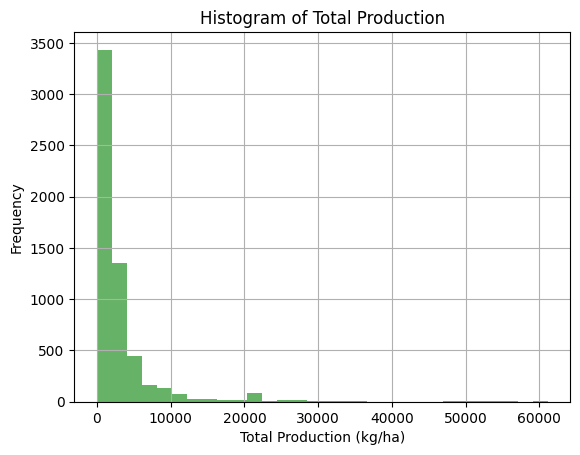

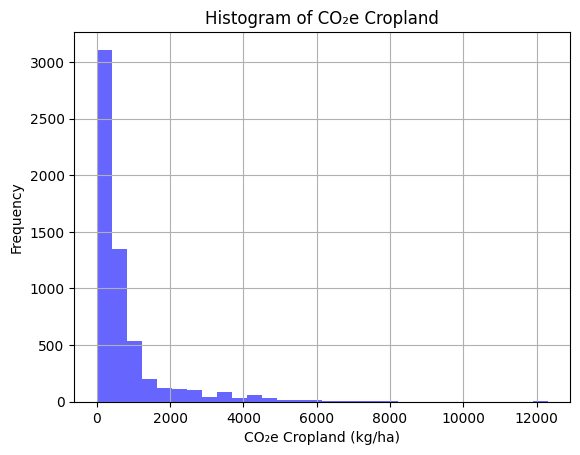

In [26]:
# Histograms

final_dataset['Total Production kg/ha'].hist(bins=30, alpha=0.6, color='g')
plt.title('Histogram of Total Production')
plt.xlabel('Total Production (kg/ha)')
plt.ylabel('Frequency')
plt.show()

final_dataset['Co2e Cropland kg/ha'].hist(bins=30, alpha=0.6, color='b')
plt.title('Histogram of CO₂e Cropland')
plt.xlabel('CO₂e Cropland (kg/ha)')
plt.ylabel('Frequency')
plt.show()

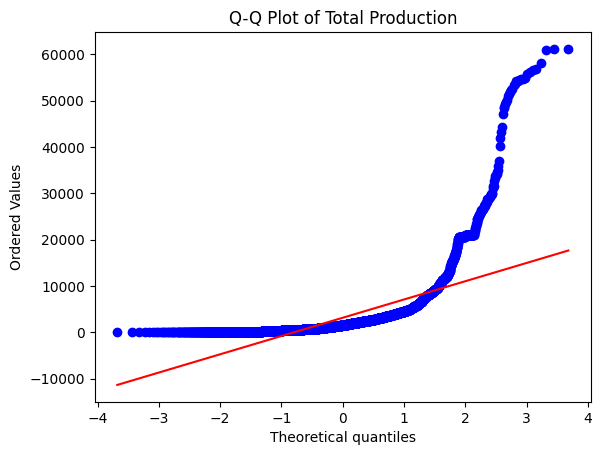

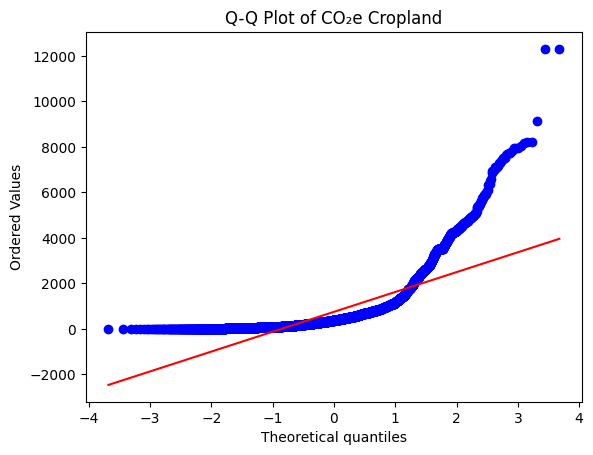

In [27]:
# Q-Q Plots

import scipy.stats as stats

stats.probplot(final_dataset['Total Production kg/ha'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Total Production')
plt.show()

stats.probplot(final_dataset['Co2e Cropland kg/ha'], dist="norm", plot=plt)
plt.title('Q-Q Plot of CO₂e Cropland')
plt.show()

In [28]:
# Shapiro-Wilk Tests to check for normal distribution

from scipy.stats import shapiro

stat, p_value = shapiro(final_dataset['Total Production kg/ha'])
print(f'Shapiro-Wilk Test for Total Production: p-value = {p_value}')

stat, p_value = shapiro(final_dataset['Co2e Cropland kg/ha'])
print(f'Shapiro-Wilk Test for CO₂e Cropland: p-value = {p_value}')

Shapiro-Wilk Test for Total Production: p-value = 1.2314996803379223e-84
Shapiro-Wilk Test for CO₂e Cropland: p-value = 4.356016841488992e-78


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5874.
  res = hypotest_fun_out(*samples, **kwds)


All the above methods show that the data is not normally distributed. The histograms show that the data is skewed to the right. The Q-Q plots show that the data does not follow the red straight line, which supports the conclusion that the data is not normally distributed. The statistical test showed a result lower than 0.05, confirming that the two main variables of this dataset are not normally distributed.

In [29]:
# Detect outliers using IQR method

def detect_iqr_outliers(series):
    """Identify outliers using the IQR method."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Select only numeric columns (excluding categorical variables)
numeric_columns = final_dataset.select_dtypes(include=['float64', 'int64']).columns
numeric_data = final_dataset[numeric_columns]

# Total number of observations in the numeric columns
total_observations = len(final_dataset)

### IQR OUTLIERS ###
outliers_iqr = numeric_data.apply(detect_iqr_outliers)

# Calculate the number of unique outlier rows (any column being an outlier in that row)
iqr_outlier_rows = outliers_iqr.any(axis=1).sum()
iqr_outlier_percentage = (iqr_outlier_rows / total_observations) * 100

# Print results
print("Outliers detected across the full dataset:\n")

print("Using IQR (1.5x interquartile range):")
print(outliers_iqr.sum())  # Outliers per column
print(f"\nTotal IQR Outliers: {iqr_outlier_rows} ({iqr_outlier_percentage:.2f}%)")

Outliers detected across the full dataset:

Using IQR (1.5x interquartile range):
Year                                 0
Co2e Cropland kg/ha                632
Total Production kg/ha             540
Synthetic Fertilizers (N) kg/ha    251
Synthetic Fertilizers (P) kg/ha    348
Synthetic Fertilizers (K) kg/ha    540
Organic Fertilizers (N) kg/ha      502
Organic Fertilizers (P) kg/ha      501
Organic Fertilizers (K) kg/ha      588
Pesticides kg/ha                   646
Electricity use TJ                 932
Value added per worker USD         759
Precipitation Ml                   262
Temperature °C                       0
Governance Index (0-100)             0
dtype: int64

Total IQR Outliers: 2894 (49.27%)


We will try 6 different methods to process this dataset:
1. Leave as is, assuming that the models are robust enough to handle distribution that is not normal -> final_dataset
2. Remove the outlier value for that specific variable, not the whole row (less aggressive) -> dataset_outliers
3. Removing the row as a whole if it has at least one variable with an outlier (more aggressive) -> dataset_outliers_aggressive
4. Applying a log transformation -> final_dataset_log
5. Combination of the less aggressive outlier handling and a log transformation -> dataset_outliers_log
6. Combination of the more aggressive outlier handling and a log transformation -> dataset_outliers_aggressive_log

---

Method 2: Remove the outlier value for that specific variable, not the whole row (less aggressive)

---

In [30]:
# Less aggressive outlier removal (Method 2)
dataset_outliers = final_dataset.copy()
dataset_outliers_numeric = dataset_outliers.select_dtypes(include='number')

# Apply the mask to the numeric columns only
dataset_outliers_numeric_masked = dataset_outliers_numeric.mask(outliers_iqr)

# Interpolate only numeric columns
dataset_outliers_numeric_interpolated = dataset_outliers_numeric_masked.interpolate(limit_direction="both")

# Replace original numeric columns in dataset
for col in dataset_outliers_numeric.columns:
    dataset_outliers[col] = dataset_outliers_numeric_interpolated[col]

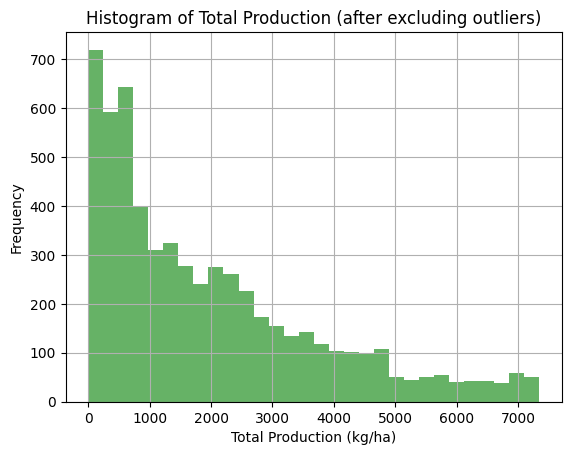

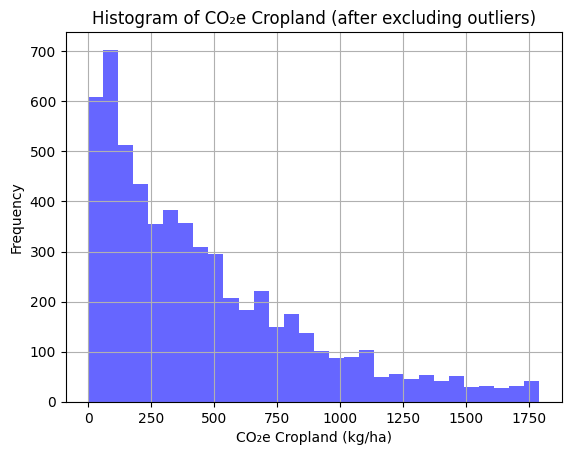

In [31]:
# Checking if the distribution is now normal after excluding the outliers

dataset_outliers['Total Production kg/ha'].hist(bins=30, alpha=0.6, color='g')
plt.title('Histogram of Total Production (after excluding outliers)')
plt.xlabel('Total Production (kg/ha)')
plt.ylabel('Frequency')
plt.show()

dataset_outliers['Co2e Cropland kg/ha'].hist(bins=30, alpha=0.6, color='b')
plt.title('Histogram of CO₂e Cropland (after excluding outliers)')
plt.xlabel('CO₂e Cropland (kg/ha)')
plt.ylabel('Frequency')
plt.show()

The distribution is more normally distributed compared to the original data, but is still not considered normal distribution because it is skewed to the right.

---

Method 3: Removing the row as a whole if it has at least one variable with an outlier (more aggressive)

---

In [32]:
# Identify countries where any row has outliers
countries_with_outliers = final_dataset[outliers_iqr.any(axis=1)]['Country Standardized'].unique()

# Filter out all rows that belong to countries with outliers
dataset_outliers_aggressive = final_dataset[~final_dataset['Country Standardized'].isin(countries_with_outliers)]

# Check the shape of the new dataset to see how many rows and countries were removed
print(f"Original dataset shape: {final_dataset.shape}")
print(f"New dataset shape (without countries with outliers): {dataset_outliers_aggressive.shape}")

# Optionally, check how many rows and countries were removed
removed_rows = final_dataset.shape[0] - dataset_outliers_aggressive.shape[0]
removed_countries = len(final_dataset['Country Standardized'].unique()) - len(dataset_outliers_aggressive['Country Standardized'].unique())

print(f"Number of rows removed: {removed_rows}")
print(f"Number of countries removed: {removed_countries}")

# dataset_outliers_aggressive = excludes the whole row (country) that has an outlier. This means that more data is lost

Original dataset shape: (5874, 16)
New dataset shape (without countries with outliers): (2112, 16)
Number of rows removed: 3762
Number of countries removed: 114


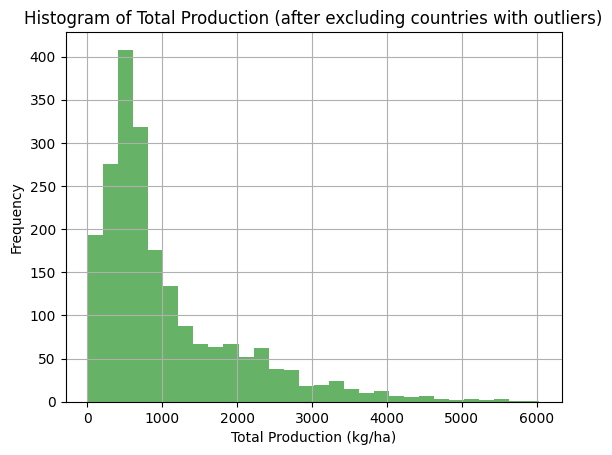

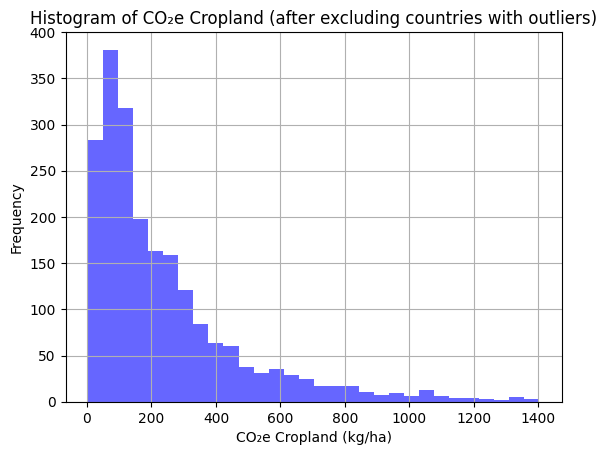

In [33]:
dataset_outliers_aggressive['Total Production kg/ha'].hist(bins=30, alpha=0.6, color='g')
plt.title('Histogram of Total Production (after excluding countries with outliers)')
plt.xlabel('Total Production (kg/ha)')
plt.ylabel('Frequency')
plt.show()

dataset_outliers_aggressive['Co2e Cropland kg/ha'].hist(bins=30, alpha=0.6, color='b')
plt.title('Histogram of CO₂e Cropland (after excluding countries with outliers)')
plt.xlabel('CO₂e Cropland (kg/ha)')
plt.ylabel('Frequency')
plt.show()

The data is more normally distributed compared to before the removal of the outliers, however it is still not normal because it is skewed to the right. Furthermore, seems that the less aggresive outlier removal method causes the data to be less skewed compared to the more aggresive outlier removal method.

---

Method 4: Applying a log transformation

---

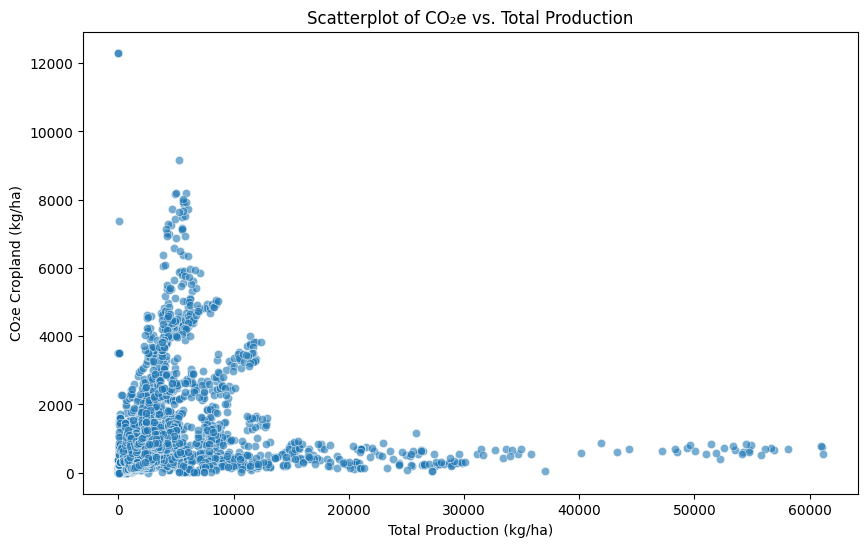

In [34]:
# Before applying a log transformation, let's see the scatterplot of the two main variables - CO2e Emissions and Total Production

# Create the scatterplot of CO2e and Total Production
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_dataset, x="Total Production kg/ha", y="Co2e Cropland kg/ha", alpha=0.6)

# Add titles and labels
plt.title("Scatterplot of CO₂e vs. Total Production")
plt.xlabel("Total Production (kg/ha)")
plt.ylabel("CO₂e Cropland (kg/ha)")

# Show the plot
plt.show()

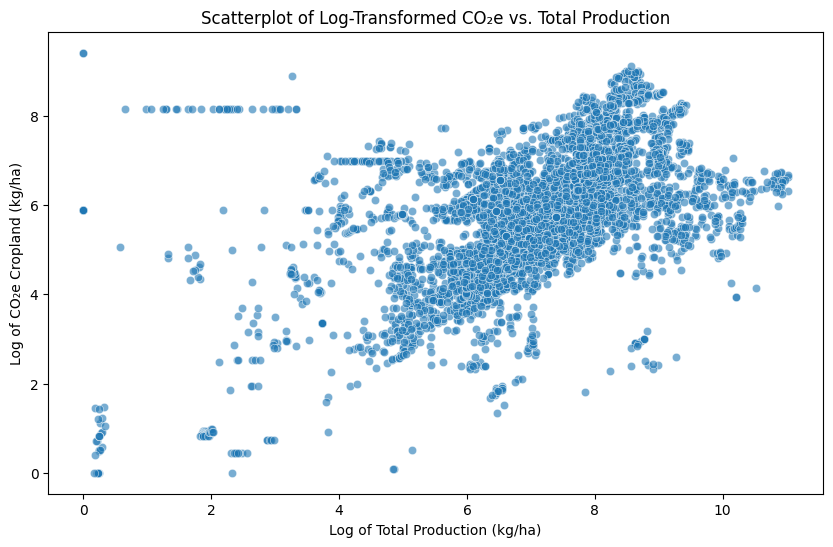

In [35]:
# Create a copy of the original dataset
final_dataset_log = final_dataset.copy()

# Step: Apply log transformation (log(x + 1) to avoid log(0) issues)
final_dataset_log["Total Production kg/ha"] = np.log(final_dataset_log["Total Production kg/ha"] + 1)
final_dataset_log["Co2e Cropland kg/ha"] = np.log(final_dataset_log["Co2e Cropland kg/ha"] + 1)

# Scatterplot of the logged data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_dataset_log, x="Total Production kg/ha", y="Co2e Cropland kg/ha", alpha=0.6)

plt.title("Scatterplot of Log-Transformed CO₂e vs. Total Production")
plt.xlabel("Log of Total Production (kg/ha)")
plt.ylabel("Log of CO₂e Cropland (kg/ha)")
plt.show()

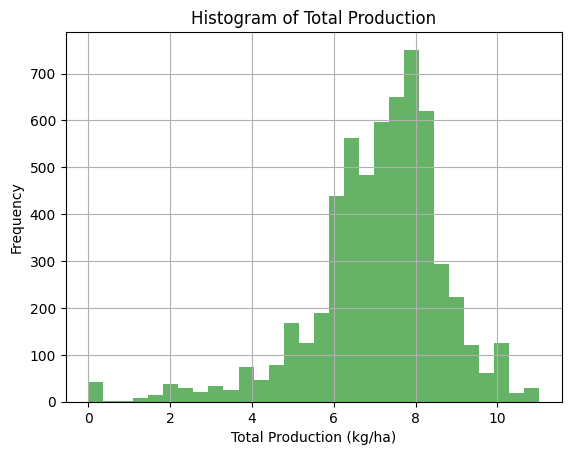

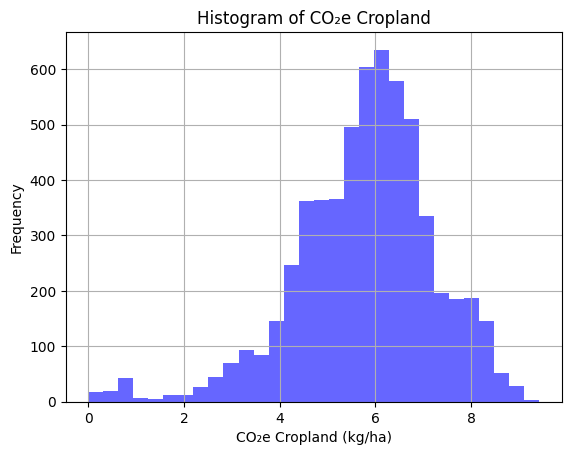

In [36]:
# Let's see if the distribition is normal after applying a log transformation

final_dataset_log['Total Production kg/ha'].hist(bins=30, alpha=0.6, color='g')
plt.title('Histogram of Total Production')
plt.xlabel('Total Production (kg/ha)')
plt.ylabel('Frequency')
plt.show()

final_dataset_log['Co2e Cropland kg/ha'].hist(bins=30, alpha=0.6, color='b')
plt.title('Histogram of CO₂e Cropland')
plt.xlabel('CO₂e Cropland (kg/ha)')
plt.ylabel('Frequency')
plt.show()

The data is now significantly more normally distributed after applying a log transformation.

---

Method 5: Combination of the less aggressive outlier handling and a log transformation


---

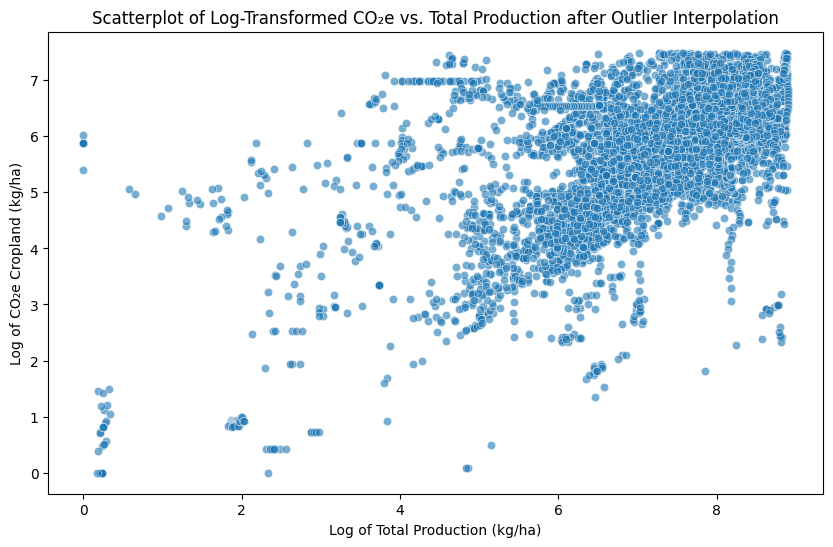

In [37]:
# Step 1: Create a copy of the interpolated outlier-cleaned dataset
dataset_outliers_log = dataset_outliers.copy()

# Step 2: Apply log(x + 1) transformation
dataset_outliers_log["Total Production kg/ha"] = np.log(dataset_outliers_log["Total Production kg/ha"] + 1)
dataset_outliers_log["Co2e Cropland kg/ha"] = np.log(dataset_outliers_log["Co2e Cropland kg/ha"] + 1)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_outliers_log, x="Total Production kg/ha", y="Co2e Cropland kg/ha", alpha=0.6)
plt.title("Scatterplot of Log-Transformed CO₂e vs. Total Production after Outlier Interpolation")
plt.xlabel("Log of Total Production (kg/ha)")
plt.ylabel("Log of CO₂e Cropland (kg/ha)")
plt.show()

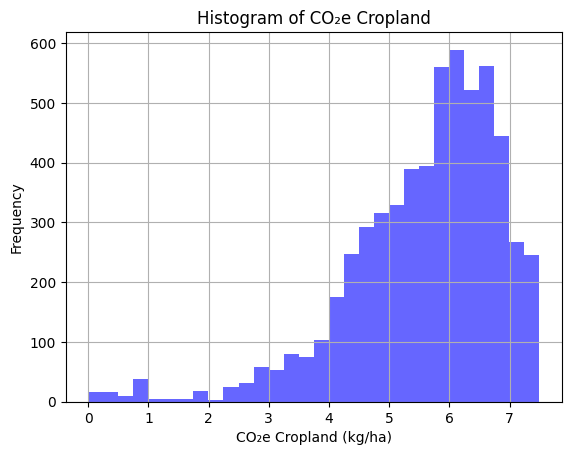

In [38]:
# Let's see if the distribition is normal after applying a combination of outlier removal and log transformation

dataset_outliers_log['Total Production kg/ha'].hist(bins=30, alpha=0.6, color='g')
plt.title('Histogram of Total Production')
plt.xlabel('Total Production (kg/ha)')
plt.ylabel('Frequency')
plt.show()

dataset_outliers_log['Co2e Cropland kg/ha'].hist(bins=30, alpha=0.6, color='b')
plt.title('Histogram of CO₂e Cropland')
plt.xlabel('CO₂e Cropland (kg/ha)')
plt.ylabel('Frequency')
plt.show()

The distribution after removing outliers and applying a log transformation looks very similar to the distribution when only a log transformation was applied.

---

Method 6: Combination of the more aggressive outlier handling and a log transformation

---

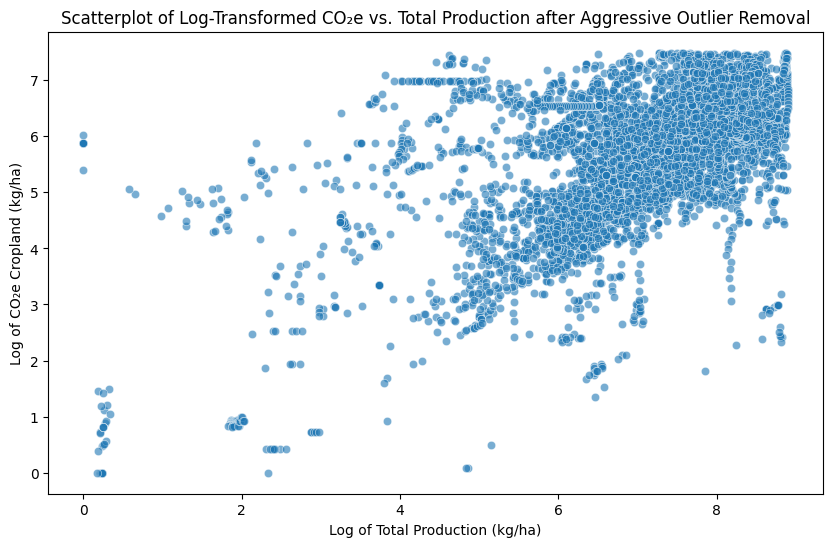

In [39]:
# Create a copy of the original dataset
dataset_outliers_aggressive_log = dataset_outliers_aggressive.copy()

# Step: Apply log transformation (log(x + 1) to avoid log(0) issues)
dataset_outliers_aggressive_log["Total Production kg/ha"] = np.log(dataset_outliers_aggressive_log["Total Production kg/ha"] + 1)
dataset_outliers_aggressive_log["Co2e Cropland kg/ha"] = np.log(dataset_outliers_aggressive_log["Co2e Cropland kg/ha"] + 1)

# Scatterplot of the logged data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_outliers_log, x="Total Production kg/ha", y="Co2e Cropland kg/ha", alpha=0.6)

plt.title("Scatterplot of Log-Transformed CO₂e vs. Total Production after Aggressive Outlier Removal")
plt.xlabel("Log of Total Production (kg/ha)")
plt.ylabel("Log of CO₂e Cropland (kg/ha)")
plt.show()

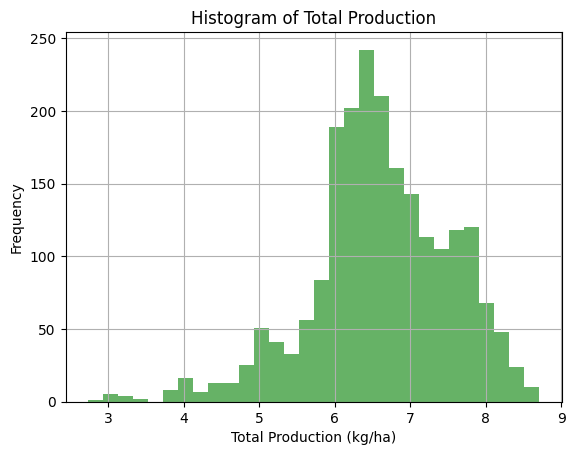

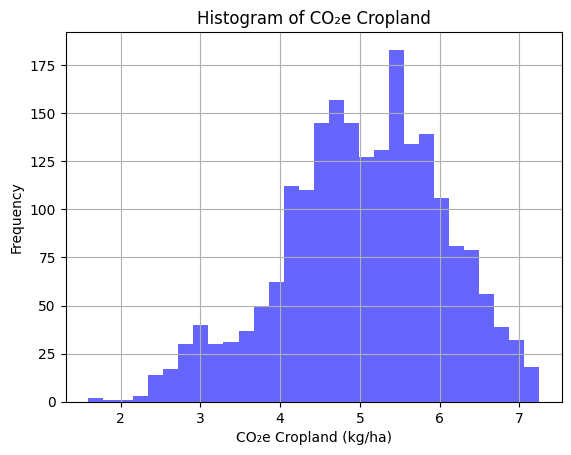

In [40]:
# Let's see if the distribition is normal after applying a combination of aggressive outlier removal and log transformation

dataset_outliers_aggressive_log['Total Production kg/ha'].hist(bins=30, alpha=0.6, color='g')
plt.title('Histogram of Total Production')
plt.xlabel('Total Production (kg/ha)')
plt.ylabel('Frequency')
plt.show()

dataset_outliers_aggressive_log['Co2e Cropland kg/ha'].hist(bins=30, alpha=0.6, color='b')
plt.title('Histogram of CO₂e Cropland')
plt.xlabel('CO₂e Cropland (kg/ha)')
plt.ylabel('Frequency')
plt.show()

The combination of the aggressive outlier removal and a log transformation makes the dataset significantly more normally distributed, more than the other methods.

The Data Analytics section below begins with a Cluster Analysis, followed by a Classification Model. Three clustering approaches are tested: K-Means, Hierarchical Clustering, and Rule-Based Clustering. Simultaneously, all six previously mentioned methods for handling outliers and non-linear data are evaluated. The combination of clustering method and data handling technique that results in the best-performing classification model is selected.

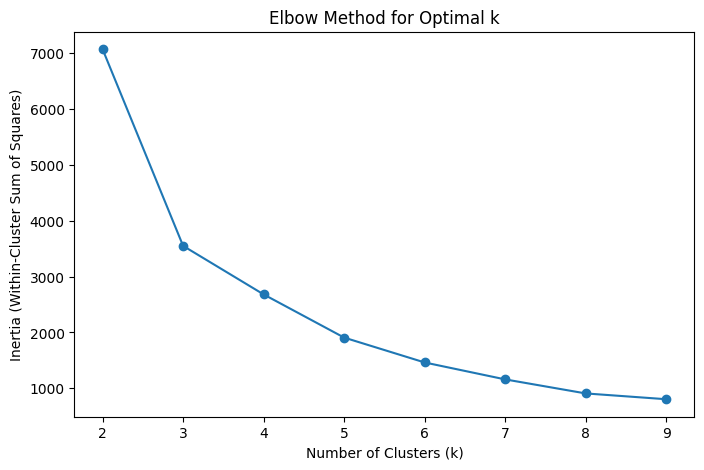

In [41]:
# Approach 1: K-means Cluster Analysis
# Visualization approach to find the best value of k (number of clusters) - the Elbow method:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting the two main variables for clustering and standardizing the data to mean = 0 and standard deviation = 1,
scaler = StandardScaler()
final_dataset_scaled = scaler.fit_transform(final_dataset[['Total Production kg/ha', 'Co2e Cropland kg/ha']])

inertia = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(final_dataset_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

The inertia shows a significant decrease up to K=3. After that, the reduction in inertia levels off, indicating diminishing returns. Nonetheless, it could be argued that K=4, K=5 and K=6 may still offer some insights. For that reason, I have decided to visualize all of them and decide the best number of K through the silhouette test.

K-means for final_dataset (Method 1: Leave as is, assuming that the models are  robust enough to handle distribution that is not normal)

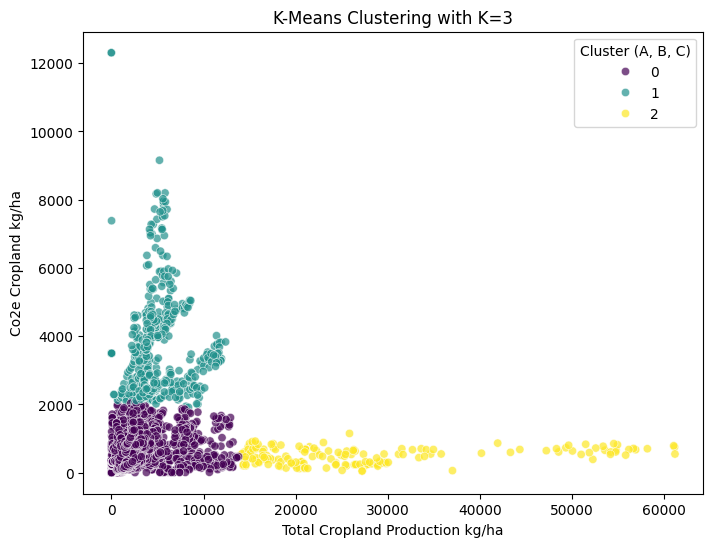

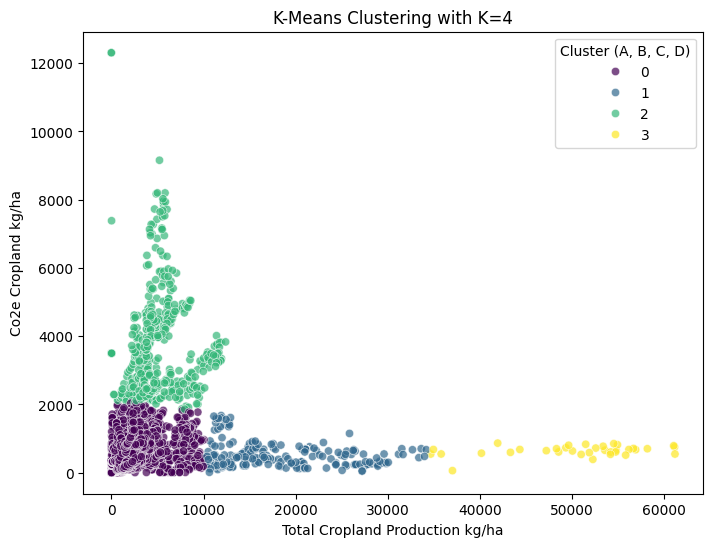

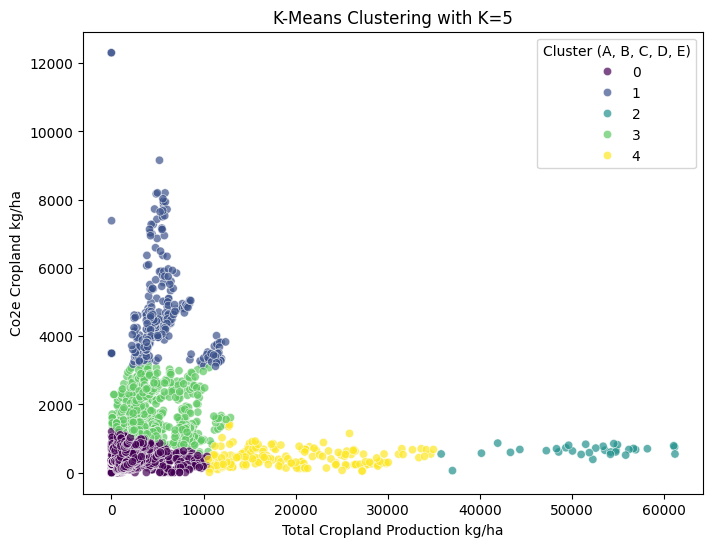

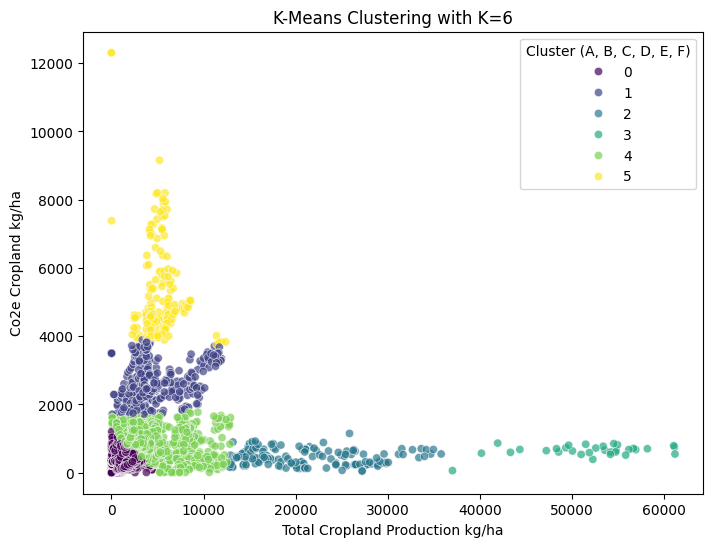

In [42]:
# Scatterplot for K=3, K=4, K=5, K=6


# Apply K-Means clustering (K=3)
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
final_dataset["Cluster_K3"] = kmeans_3.fit_predict(final_dataset_scaled)

# Apply K-Means clustering (K=4)
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
final_dataset["Cluster_K4"] = kmeans_4.fit_predict(final_dataset_scaled)

# Apply K-Means clustering (K=5)
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
final_dataset["Cluster_K5"] = kmeans_5.fit_predict(final_dataset_scaled)

# Apply K-Means clustering (K=6)
kmeans_6 = KMeans(n_clusters=6, random_state=42, n_init=10)
final_dataset["Cluster_K6"] = kmeans_6.fit_predict(final_dataset_scaled)

# Plot K=3
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_dataset, x="Total Production kg/ha", y="Co2e Cropland kg/ha",
                hue="Cluster_K3", palette="viridis", alpha=0.7)
plt.xlabel("Total Cropland Production kg/ha")
plt.ylabel("Co2e Cropland kg/ha")
plt.title("K-Means Clustering with K=3")
plt.legend(title="Cluster (A, B, C)")
plt.show()

# Plot K=4
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_dataset, x="Total Production kg/ha", y="Co2e Cropland kg/ha",
                hue="Cluster_K4", palette="viridis", alpha=0.7)
plt.xlabel("Total Cropland Production kg/ha")
plt.ylabel("Co2e Cropland kg/ha")
plt.title("K-Means Clustering with K=4")
plt.legend(title="Cluster (A, B, C, D)")
plt.show()

# Plot K=5
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_dataset, x="Total Production kg/ha", y="Co2e Cropland kg/ha",
                hue="Cluster_K5", palette="viridis", alpha=0.7)
plt.xlabel("Total Cropland Production kg/ha")
plt.ylabel("Co2e Cropland kg/ha")
plt.title("K-Means Clustering with K=5")
plt.legend(title="Cluster (A, B, C, D, E)")
plt.show()

# Plot K=6
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_dataset, x="Total Production kg/ha", y="Co2e Cropland kg/ha",
                hue="Cluster_K6", palette="viridis", alpha=0.7)
plt.xlabel("Total Cropland Production kg/ha")
plt.ylabel("Co2e Cropland kg/ha")
plt.title("K-Means Clustering with K=6")
plt.legend(title="Cluster (A, B, C, D, E, F)")
plt.show()

Below is a code to remove the data that causes the far away dots in the scatterplot, possibly created from synthetically filling the missing data. I looked in the Excel for the country that has a CO2e emissions of approximately 12000 and found that it belongs to Singapore. Then I looked for a country that has Total Production of close to 0 but CO2e increasing at a steady rate and found the data to belong to country Bahrain, which I deleted as well. In the process, I noticed that country Saint Kitts and Nevis had 0 production but still some CO2e emitted, and since it seemed like a mistake in the dataset I deleted it as well. Lastly, I removed the country Mauritus as it is the only country responsible for the highest observations of Total Cropland Production between 40000-60000 kg/ha. Although in Method 1 no outliers are removed, the countries mentioned above are removed as an exception because theses outliers seem to be caused from synthetically creating the data and not an actual outlier.

In [43]:
# List of countries to remove
countries_to_remove = ["Singapore", "Mauritius", "Saint Kitts and Nevis", "Bahrain"]

# Remove these countries from all 6 datasets
final_dataset = final_dataset[~final_dataset["Country Standardized"].isin(countries_to_remove)]
dataset_outliers = dataset_outliers[~dataset_outliers["Country Standardized"].isin(countries_to_remove)]
dataset_outliers_aggressive = dataset_outliers_aggressive[~dataset_outliers_aggressive["Country Standardized"].isin(countries_to_remove)]
final_dataset_log = final_dataset_log[~final_dataset_log["Country Standardized"].isin(countries_to_remove)]
dataset_outliers_log = dataset_outliers_log[~dataset_outliers_log["Country Standardized"].isin(countries_to_remove)]
dataset_outliers_aggressive_log = dataset_outliers_aggressive_log[~dataset_outliers_aggressive_log["Country Standardized"].isin(countries_to_remove)]

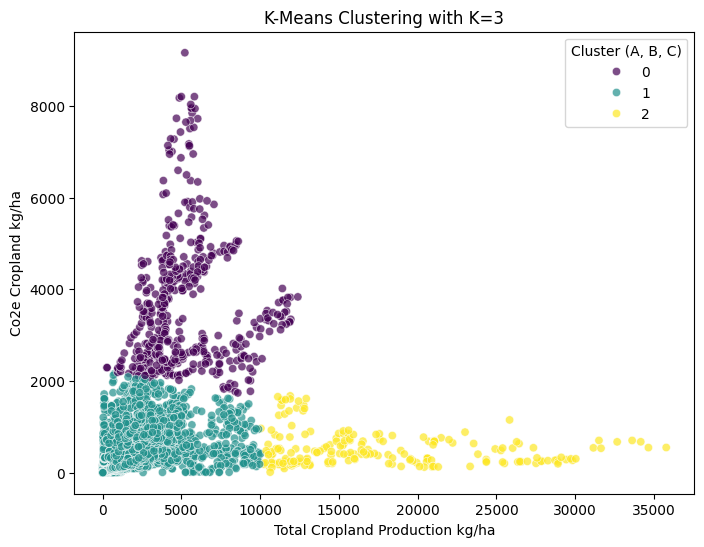

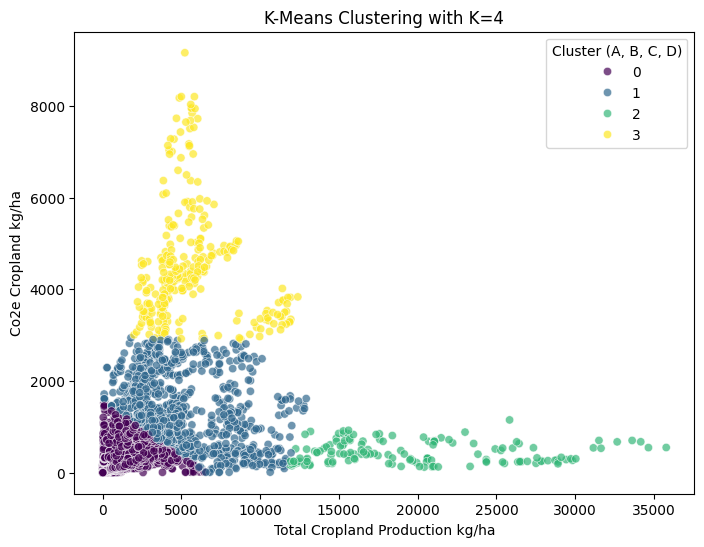

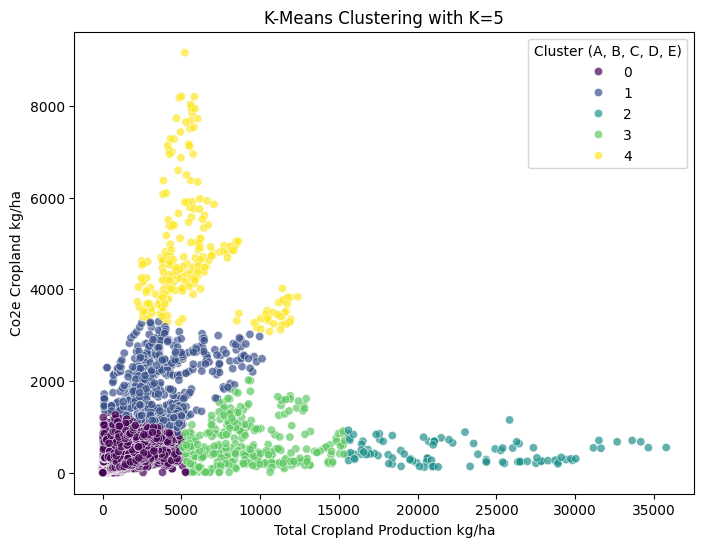

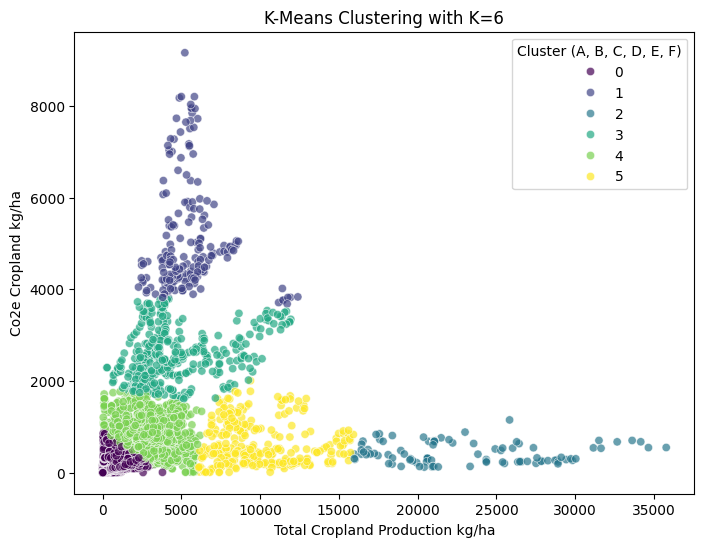

In [44]:
# Scatterplot for K=3, K=4, K=5, K=6 after removing the above-mentioned countries

scaler = StandardScaler()
final_dataset_scaled = scaler.fit_transform(final_dataset[['Total Production kg/ha', 'Co2e Cropland kg/ha']])

# Apply K-Means clustering (K=3)
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
final_dataset["Cluster_K3"] = kmeans_3.fit_predict(final_dataset_scaled)

# Apply K-Means clustering (K=4)
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
final_dataset["Cluster_K4"] = kmeans_4.fit_predict(final_dataset_scaled)

# Apply K-Means clustering (K=5)
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
final_dataset["Cluster_K5"] = kmeans_5.fit_predict(final_dataset_scaled)

# Apply K-Means clustering (K=6)
kmeans_6 = KMeans(n_clusters=6, random_state=42, n_init=10)
final_dataset["Cluster_K6"] = kmeans_6.fit_predict(final_dataset_scaled)

# Plot K=3
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_dataset, x="Total Production kg/ha", y="Co2e Cropland kg/ha",
                hue="Cluster_K3", palette="viridis", alpha=0.7)
plt.xlabel("Total Cropland Production kg/ha")
plt.ylabel("Co2e Cropland kg/ha")
plt.title("K-Means Clustering with K=3")
plt.legend(title="Cluster (A, B, C)")
plt.show()

# Plot K=4
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_dataset, x="Total Production kg/ha", y="Co2e Cropland kg/ha",
                hue="Cluster_K4", palette="viridis", alpha=0.7)
plt.xlabel("Total Cropland Production kg/ha")
plt.ylabel("Co2e Cropland kg/ha")
plt.title("K-Means Clustering with K=4")
plt.legend(title="Cluster (A, B, C, D)")
plt.show()

# Plot K=5
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_dataset, x="Total Production kg/ha", y="Co2e Cropland kg/ha",
                hue="Cluster_K5", palette="viridis", alpha=0.7)
plt.xlabel("Total Cropland Production kg/ha")
plt.ylabel("Co2e Cropland kg/ha")
plt.title("K-Means Clustering with K=5")
plt.legend(title="Cluster (A, B, C, D, E)")
plt.show()

# Plot K=6
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_dataset, x="Total Production kg/ha", y="Co2e Cropland kg/ha",
                hue="Cluster_K6", palette="viridis", alpha=0.7)
plt.xlabel("Total Cropland Production kg/ha")
plt.ylabel("Co2e Cropland kg/ha")
plt.title("K-Means Clustering with K=6")
plt.legend(title="Cluster (A, B, C, D, E, F)")
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

# Define features used for clustering
features = ['Total Production kg/ha', 'Co2e Cropland kg/ha']

# Function to compute silhouette scores (includes scaling)
def compute_silhouette_scores(k_values=[3, 4, 5, 6]):
    silhouette_scores = {}

    # Scale all datasets (except final_dataset_scaled, which is already scaled)
    scaler = StandardScaler()
    dataset_outliers_scaled = scaler.fit_transform(dataset_outliers[features])
    dataset_outliers_aggressive_scaled = scaler.fit_transform(dataset_outliers_aggressive[features])
    final_dataset_log_scaled = scaler.fit_transform(final_dataset_log[features])
    dataset_outliers_log_scaled = scaler.fit_transform(dataset_outliers_log[features])
    dataset_outliers_aggressive_log_scaled = scaler.fit_transform(dataset_outliers_aggressive_log[features])

    # Dictionary to hold data and corresponding cluster labels
    cluster_labels_dict = {
        "Original": {"data": final_dataset_scaled, "labels": final_dataset},
        "Outliers Less Aggressive": {"data": dataset_outliers_scaled, "labels": dataset_outliers},
        "Outliers More Aggressive": {"data": dataset_outliers_aggressive_scaled, "labels": dataset_outliers_aggressive},
        "Log Transformation": {"data": final_dataset_log_scaled, "labels": final_dataset_log},
        "Outliers + Log Transformation Less Aggressive": {"data": dataset_outliers_log_scaled, "labels": dataset_outliers_log},
        "Outliers + Log Transformation More Aggressive": {"data": dataset_outliers_aggressive_log_scaled, "labels": dataset_outliers_aggressive_log}
    }

    for k in k_values:
        for method, datasets in cluster_labels_dict.items():
            cluster_data_scaled = datasets["data"]

            # Run K-means clustering to generate cluster labels
            kmeans = KMeans(n_clusters=k, random_state=42)
            cluster_labels = kmeans.fit_predict(cluster_data_scaled)

            # Add cluster labels as a new column in the labels dataframe
            datasets["labels"][f"Cluster_K{k}"] = cluster_labels

            # Compute the silhouette score for each method and K value
            silhouette_scores[f"{method}_K={k}"] = silhouette_score(cluster_data_scaled, cluster_labels)

    return silhouette_scores

# Calculate and display silhouette scores
silhouette_scores = compute_silhouette_scores(k_values=[3, 4, 5, 6])
silhouette_df = pd.DataFrame.from_dict(silhouette_scores, orient='index', columns=['Silhouette Score'])
silhouette_df_sorted = silhouette_df.sort_values(by='Silhouette Score', ascending=False)

print("\nSilhouette Scores Sorted (Highest to Lowest):")
print(silhouette_df_sorted)


Silhouette Scores Sorted (Highest to Lowest):
                                                   Silhouette Score
Original_K=3                                               0.728694
Original_K=4                                               0.582025
Original_K=5                                               0.571359
Outliers More Aggressive_K=3                               0.562761
Outliers More Aggressive_K=6                               0.539743
Outliers More Aggressive_K=4                               0.518398
Outliers More Aggressive_K=5                               0.508392
Outliers Less Aggressive_K=3                               0.503765
Original_K=6                                               0.491207
Outliers + Log Transformation Less Aggressive_K=3          0.456191
Outliers Less Aggressive_K=5                               0.443048
Outliers Less Aggressive_K=6                               0.441765
Outliers Less Aggressive_K=4                               0.441714
O

The combination of K=3, together with Method 1 of keeping the data as is (non-linear and including outliers) has the highest silhouette score of 0.728694, meaning that it is the most efficient number of clusters. Let's plot the result to see if the clusters are well balanced in size.

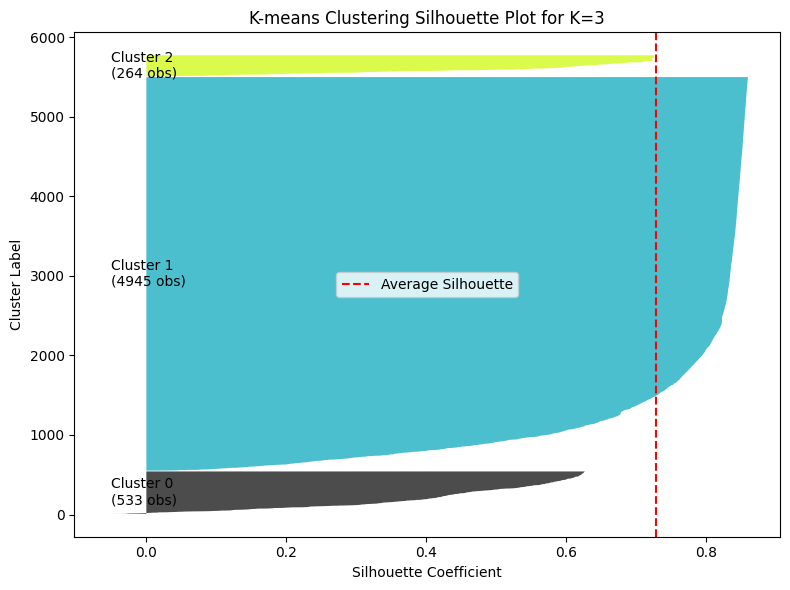

In [46]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Get the silhouette values
silhouette_values = silhouette_samples(final_dataset_scaled, final_dataset["Cluster_K3"])

# Get the number of clusters
n_clusters = len(np.unique(final_dataset["Cluster_K3"]))

# Get cluster counts for the label 'Cluster_K3'
cluster_counts_kmeans = final_dataset["Cluster_K3"].value_counts().sort_index()

# Plot Silhouette Analysis
plt.figure(figsize=(8, 6))
y_lower = 10

# Loop over each unique cluster (Cluster_K3)
for i in np.unique(final_dataset["Cluster_K3"]):
    ith_values = silhouette_values[final_dataset["Cluster_K3"] == i]
    ith_values.sort()
    size = ith_values.shape[0]
    y_upper = y_lower + size

    # Plot the silhouette values for the current cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_values,
                      facecolor=cm.nipy_spectral(float(i) / n_clusters),
                      edgecolor='none', alpha=0.7)

    # Add cluster label with observation count
    plt.text(-0.05, y_lower + 0.5 * size, f"Cluster {i}\n({cluster_counts_kmeans[i]} obs)", fontsize=10, verticalalignment="center")

    y_lower = y_upper + 10  # Update the y_lower for the next cluster

# Add labels and title
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.title("K-means Clustering Silhouette Plot for K=3")
plt.axvline(x=np.mean(silhouette_values), color='red', linestyle='--', label='Average Silhouette')
plt.legend()
plt.tight_layout()
plt.show()

The clusters are not balanced because Cluster 1 is significantly larger than Cluster 0 and Cluster 2. This means that we cannot use K-means as a clustering method for this analysis. Therefore, we proceed with the second Cluster Analysis approach: Hierarchical Clustering.

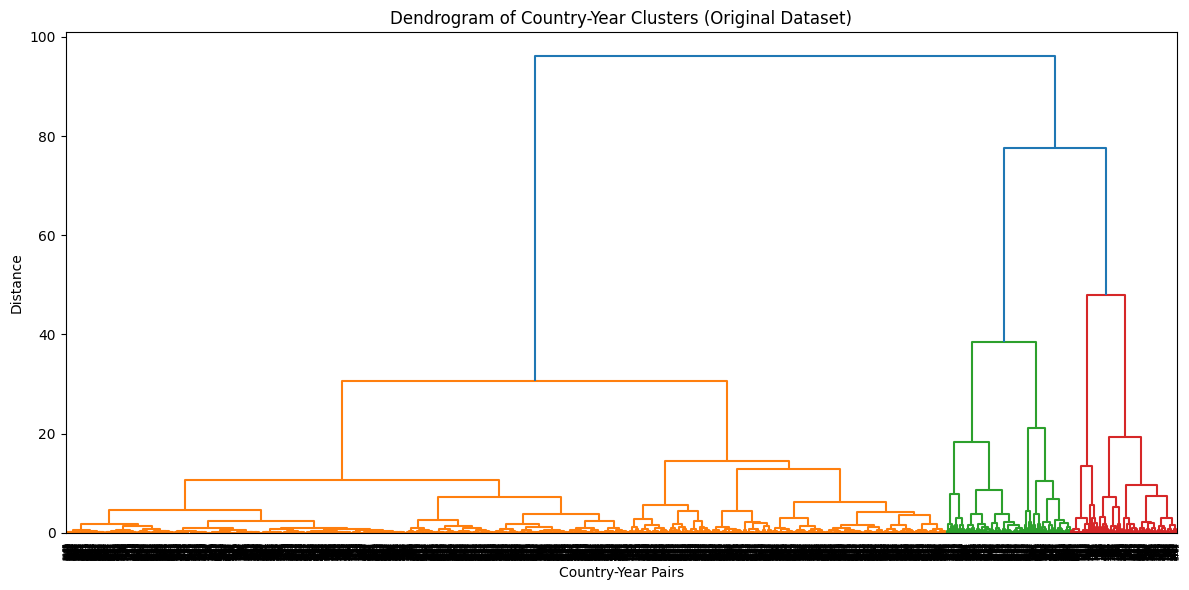

In [47]:
from scipy.cluster import hierarchy

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_dataset[["Total Production kg/ha", "Co2e Cropland kg/ha"]])

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(data_scaled, method="ward")

# Plot dendrogram
plt.figure(figsize=(12, 6))
hierarchy.dendrogram(linkage_matrix, labels=final_dataset.index, leaf_rotation=90)
plt.title("Dendrogram of Country-Year Clusters (Original Dataset)")
plt.ylabel("Distance")
plt.xlabel("Country-Year Pairs")
plt.tight_layout()
plt.show()

A dendrogram was generated using hierarchical clustering on the original dataset to determine a meaningful number of clusters. The longest vertical line without horizontal cuts appeared around a linkage distance of 70-95, suggesting a natural division into four clusters. Based on this visual inspection, a range of K = 3 to 5 clusters was selected for further quantitative evaluation using silhouette analysis across all preprocessing methods.

In [48]:
from sklearn.cluster import AgglomerativeClustering

# Define features used for clustering
features = ['Total Production kg/ha', 'Co2e Cropland kg/ha']

def compute_silhouette_scores_hierarchical(k_values=[3, 4, 5]):
    silhouette_scores = {}

    # Scale each dataset once and store the result
    scaler = StandardScaler()
    cluster_labels_dict = {
        "Original": {"data": final_dataset_scaled, "labels": final_dataset},
        "Outliers Less Aggressive": {"data": scaler.fit_transform(dataset_outliers[features]), "labels": dataset_outliers},
        "Outliers More Aggressive": {"data": scaler.fit_transform(dataset_outliers_aggressive[features]), "labels": dataset_outliers_aggressive},
        "Log Transformation": {"data": scaler.fit_transform(final_dataset_log[features]), "labels": final_dataset_log},
        "Outliers + Log Transformation Less Aggressive": {"data": scaler.fit_transform(dataset_outliers_log[features]), "labels": dataset_outliers_log},
        "Outliers + Log Transformation More Aggressive": {"data": scaler.fit_transform(dataset_outliers_aggressive_log[features]), "labels": dataset_outliers_aggressive_log}
    }

    for k in k_values:
        for method, datasets in cluster_labels_dict.items():
            cluster_data_scaled = datasets["data"]

            # Apply hierarchical clustering
            model = AgglomerativeClustering(n_clusters=k)
            cluster_labels = model.fit_predict(cluster_data_scaled)

            # Save cluster labels to dataframe
            datasets["labels"][f"Cluster_Hierarchical_K{k}"] = cluster_labels

            # Compute silhouette score
            silhouette_scores[f"{method}_K={k}"] = silhouette_score(cluster_data_scaled, cluster_labels)

    return silhouette_scores

# Run and display silhouette scores
silhouette_scores_hierarchical = compute_silhouette_scores_hierarchical(k_values=[3, 4, 5])
silhouette_df = pd.DataFrame.from_dict(silhouette_scores_hierarchical, orient='index', columns=['Silhouette Score'])
silhouette_df_sorted = silhouette_df.sort_values(by='Silhouette Score', ascending=False)

print("\nSilhouette Scores Sorted (Highest to Lowest):")
print(silhouette_df_sorted)


Silhouette Scores Sorted (Highest to Lowest):
                                                   Silhouette Score
Original_K=3                                               0.682316
Original_K=4                                               0.638898
Original_K=5                                               0.636200
Outliers More Aggressive_K=5                               0.513225
Outliers More Aggressive_K=3                               0.492398
Outliers More Aggressive_K=4                               0.492146
Outliers + Log Transformation Less Aggressive_K=3          0.462759
Outliers Less Aggressive_K=3                               0.459731
Outliers + Log Transformation Less Aggressive_K=4          0.424822
Outliers Less Aggressive_K=4                               0.396269
Outliers Less Aggressive_K=5                               0.396144
Outliers + Log Transformation More Aggressive_K=4          0.376200
Outliers + Log Transformation More Aggressive_K=3          0.363282
O

The combination of K=3, together with Method 1 of keeping the data as is (non-linear and including outliers) has the highest silhouette score of 0.682316, meaning that it is the most efficient number of clusters. Let's plot the result to see if the clusters are well balanced in size.

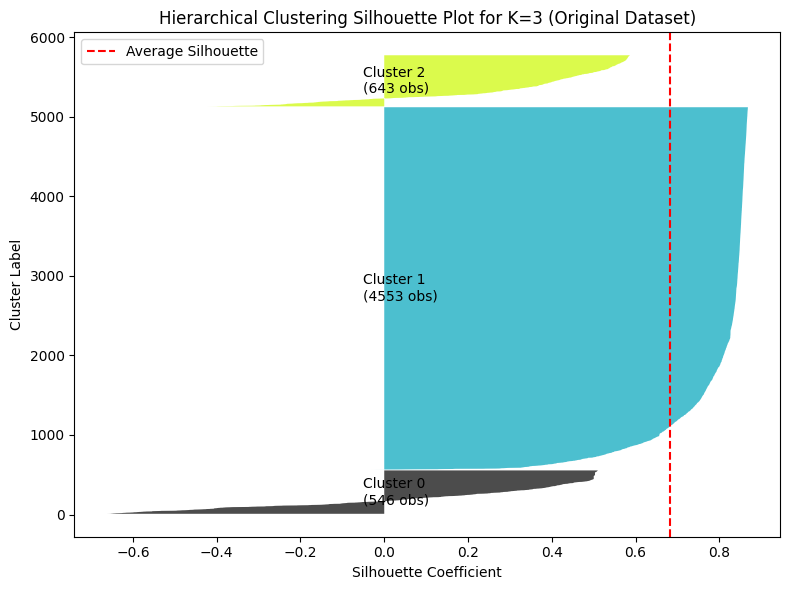

In [49]:
import matplotlib.cm as cm

# Get silhouette values using existing labels and scaled data
silhouette_values = silhouette_samples(final_dataset_scaled, final_dataset["Cluster_Hierarchical_K3"])

# Count points per cluster
cluster_counts = final_dataset["Cluster_Hierarchical_K3"].value_counts().sort_index()
n_clusters = cluster_counts.shape[0]

# Plot
plt.figure(figsize=(8, 6))
y_lower = 10

for i in range(n_clusters):
    ith_values = silhouette_values[final_dataset["Cluster_Hierarchical_K3"] == i]
    ith_values.sort()
    size = ith_values.shape[0]
    y_upper = y_lower + size

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_values,
                      facecolor=cm.nipy_spectral(float(i) / n_clusters),
                      edgecolor='none', alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size, f"Cluster {i}\n({size} obs)", fontsize=10, va="center")

    y_lower = y_upper + 10

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.title("Hierarchical Clustering Silhouette Plot for K=3 (Original Dataset)")
plt.axvline(x=np.mean(silhouette_values), color='red', linestyle='--', label='Average Silhouette')
plt.legend()
plt.tight_layout()
plt.show()

The clusters are not balanced because Cluster 0 is significantly larger than Cluster 1 and Cluster 2. This means that we cannot use Hierarchical Clustering either. Therefore, we proceed with the third Cluster Analysis approach: Rule-Based Clustering approach. Silhouette scores are best suited for distance-based clustering methods (like K-Means and Hierarchical Clustering), where clusters are formed based on proximity. Rule-based clustering follows a fixed threshold approach, meaning that clusters are not formed based on similarity but based on predefined boundaries. The limitation of k-means and the hierarchical clustering was that they did not split the data into balanced clusters. The Rule-based clustering approach offers a better division (50% median CO2e Cropland, 50% median Total Production). Due to that I have chosen the Rule-based clustering to proceed with the classification model.

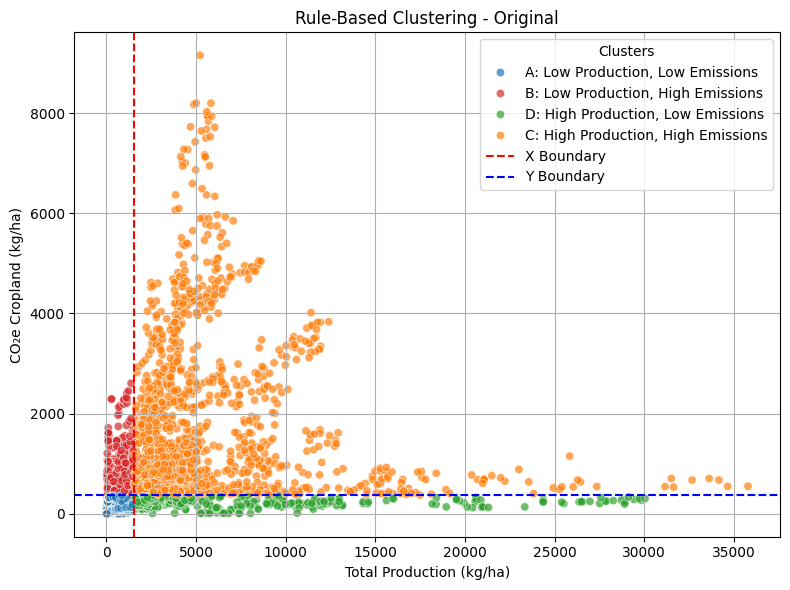

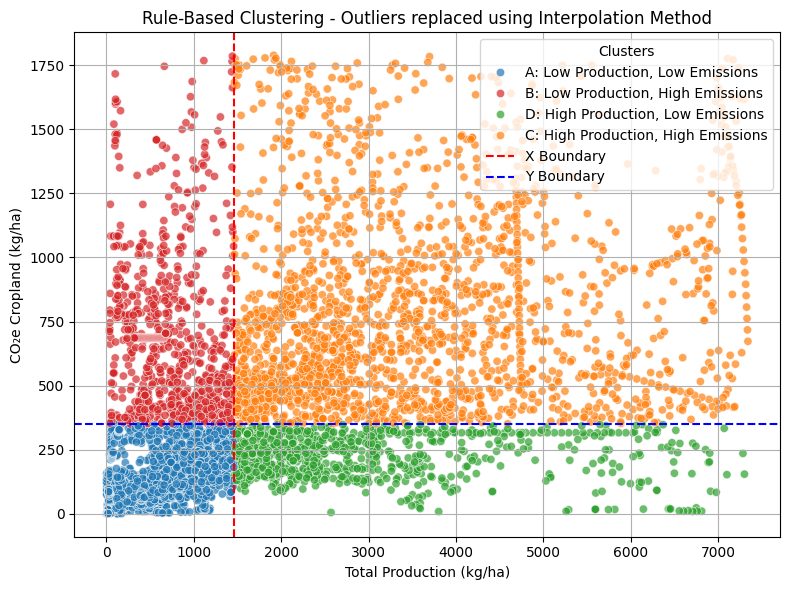

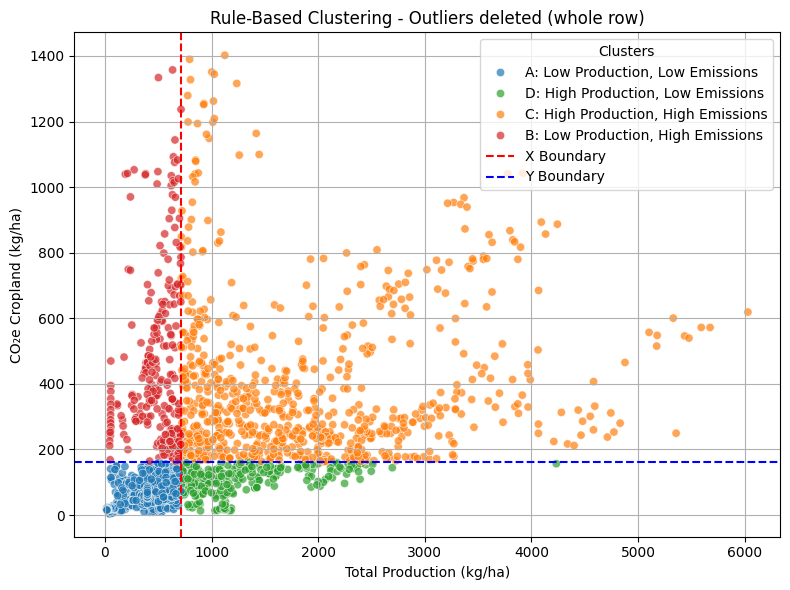

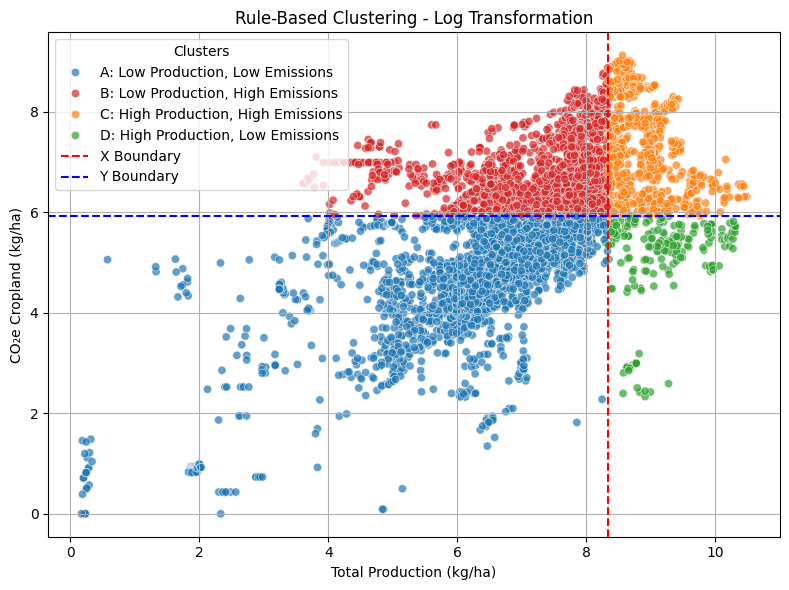

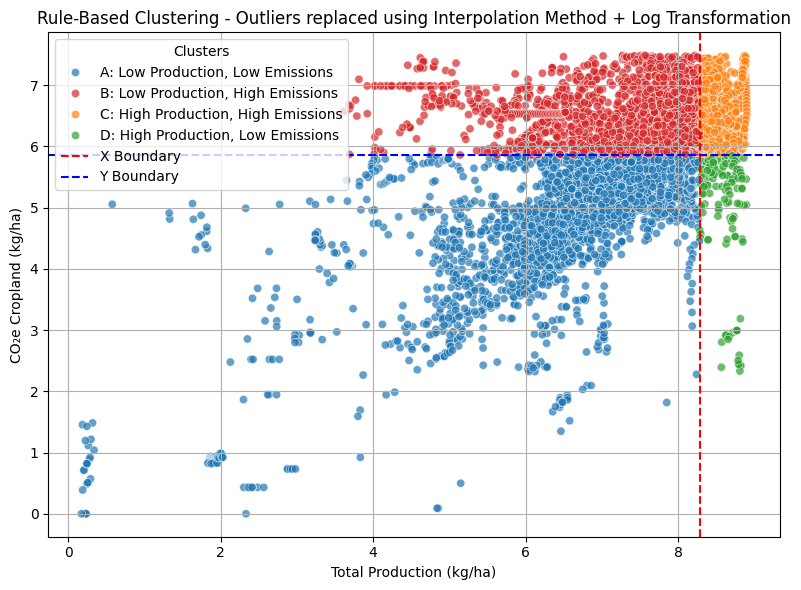

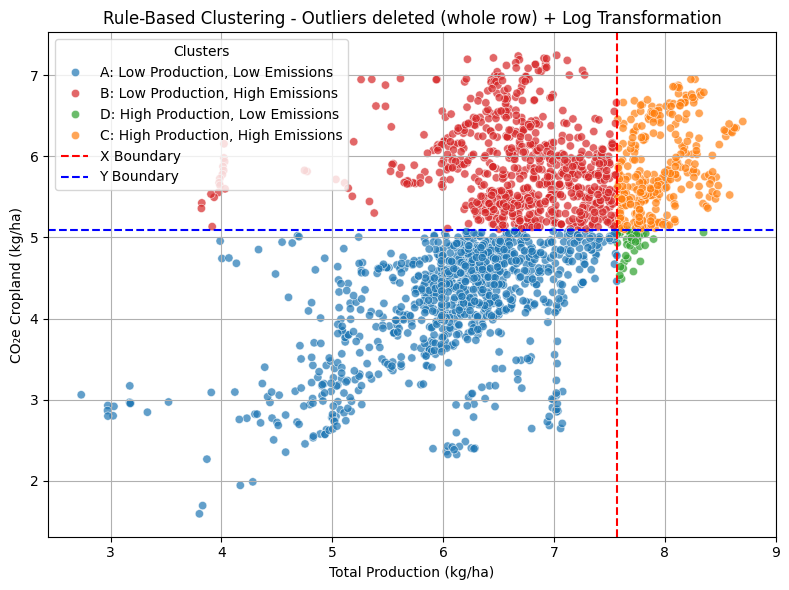

In [50]:
# Define features
features = ['Total Production kg/ha', 'Co2e Cropland kg/ha']

# Rule-based boundary function
def adjust_boundaries(points, max_iterations=100, tolerance=1):
    points = np.array(points)
    x_split = np.median(points[:, 0])
    y_split = np.median(points[:, 1])

    def count_quadrants(x, y):
        q1 = np.sum((points[:, 0] >= x) & (points[:, 1] >= y))
        q2 = np.sum((points[:, 0] < x) & (points[:, 1] >= y))
        q3 = np.sum((points[:, 0] < x) & (points[:, 1] < y))
        q4 = np.sum((points[:, 0] >= x) & (points[:, 1] < y))
        return q1, q2, q3, q4

    for _ in range(max_iterations):
        q1, q2, q3, q4 = count_quadrants(x_split, y_split)
        if max([q1, q2, q3, q4]) - min([q1, q2, q3, q4]) <= tolerance:
            break
        x_split += 0.01 if q1 + q4 <= q2 + q3 else -0.01
        y_split += 0.01 if q3 + q4 <= q1 + q2 else -0.01

    return x_split, y_split

# Cluster assignment function
def assign_cluster(row, x_boundary, y_boundary):
    if row[features[0]] >= x_boundary and row[features[1]] >= y_boundary:
        return "C: High Production, High Emissions"
    elif row[features[0]] < x_boundary and row[features[1]] >= y_boundary:
        return "B: Low Production, High Emissions"
    elif row[features[0]] < x_boundary and row[features[1]] < y_boundary:
        return "A: Low Production, Low Emissions"
    else:
        return "D: High Production, Low Emissions"

# C luster colors
custom_palette = {
    "A: Low Production, Low Emissions": "#1f77b4",  # Blue
    "B: Low Production, High Emissions": "#d62728", # Red
    "C: High Production, High Emissions": "#ff7f0e",  # Orange
    "D: High Production, Low Emissions": "#2ca02c",  # Green

}

# Define datasets
datasets = {
    "Original": final_dataset,
    "Outliers replaced using Interpolation Method": dataset_outliers,
    "Outliers deleted (whole row)": dataset_outliers_aggressive,
    "Log Transformation": final_dataset_log,
    "Outliers replaced using Interpolation Method + Log Transformation": dataset_outliers_log,
    "Outliers deleted (whole row) + Log Transformation": dataset_outliers_aggressive_log
}

# Apply rule-based clustering and plot
for name in datasets:
    df = datasets[name]
    df_clean = df.dropna(subset=features).copy()
    points = df_clean[features].values
    x_boundary, y_boundary = adjust_boundaries(points)
    df_clean["Quadrant_Cluster"] = df_clean.apply(assign_cluster, axis=1, args=(x_boundary, y_boundary))

    # Save back to main dataset
    datasets[name] = df_clean

    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_clean, x=features[0], y=features[1],
                    hue="Quadrant_Cluster", palette=custom_palette, alpha=0.7)
    plt.axvline(x=x_boundary, color="red", linestyle="--", label="X Boundary")
    plt.axhline(y=y_boundary, color="blue", linestyle="--", label="Y Boundary")
    plt.xlabel("Total Production (kg/ha)")
    plt.ylabel("CO₂e Cropland (kg/ha)")
    plt.title(f"Rule-Based Clustering - {name}")
    plt.legend(title="Clusters")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-2045634958.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Quadrant_Cluster", order=cluster_order, palette=custom_palette)


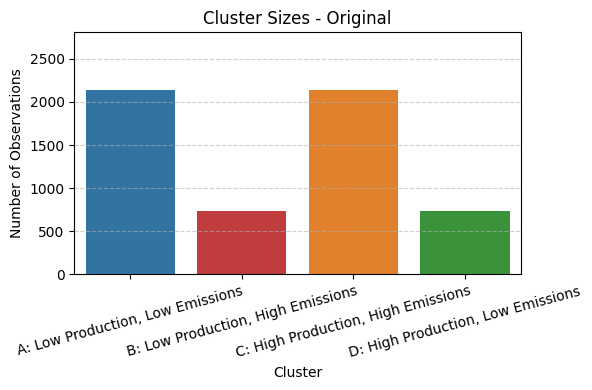

/tmp/ipython-input-2045634958.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Quadrant_Cluster", order=cluster_order, palette=custom_palette)


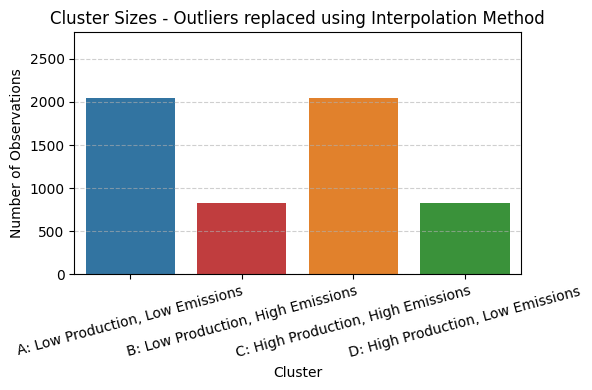

/tmp/ipython-input-2045634958.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Quadrant_Cluster", order=cluster_order, palette=custom_palette)


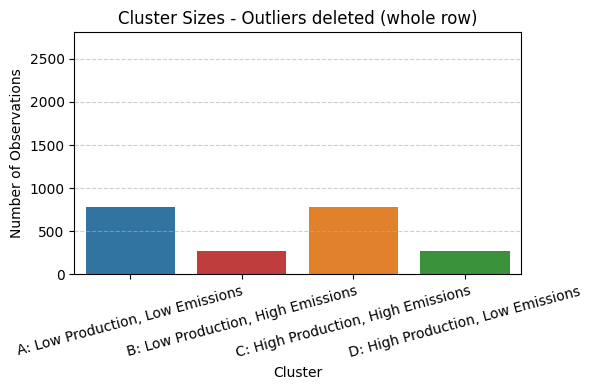

/tmp/ipython-input-2045634958.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Quadrant_Cluster", order=cluster_order, palette=custom_palette)


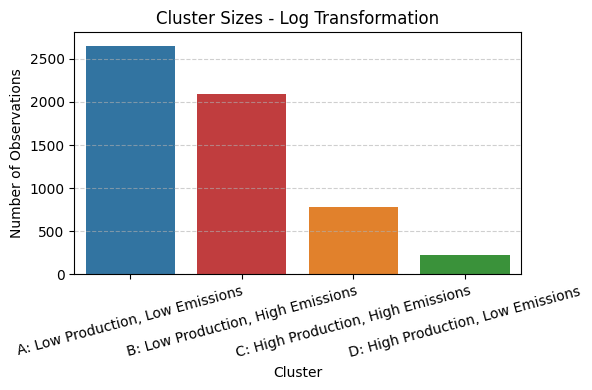

/tmp/ipython-input-2045634958.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Quadrant_Cluster", order=cluster_order, palette=custom_palette)


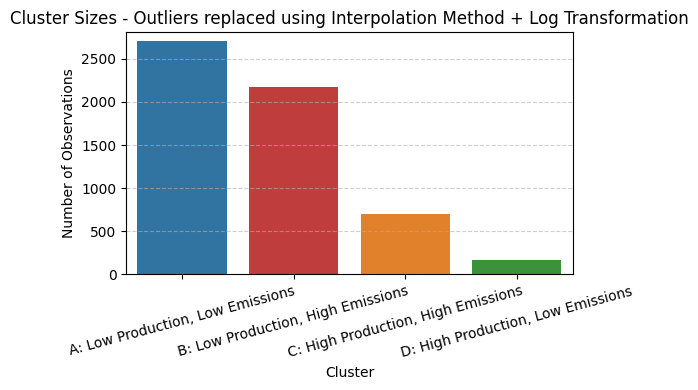

/tmp/ipython-input-2045634958.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Quadrant_Cluster", order=cluster_order, palette=custom_palette)


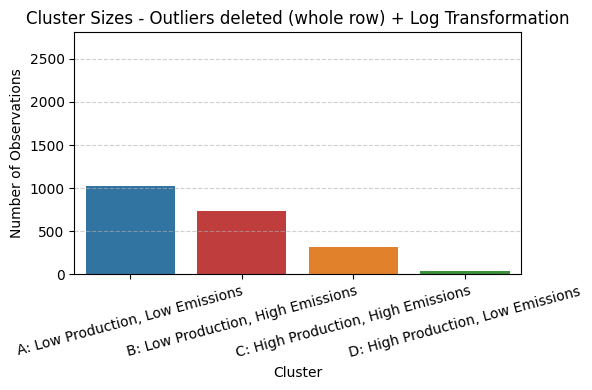

In [51]:
# Color palette (same as scatterplot)
custom_palette = {
    "A: Low Production, Low Emissions": "#1f77b4",  # Blue
    "B: Low Production, High Emissions": "#d62728", # Red
    "C: High Production, High Emissions": "#ff7f0e",  # Orange
    "D: High Production, Low Emissions": "#2ca02c",  # Green
}

# First, find the maximum cluster size across all methods
max_count = 0
for df in datasets.values():
    if "Quadrant_Cluster" in df.columns:
        max_cluster_size = df["Quadrant_Cluster"].value_counts().max()
        if max_cluster_size > max_count:
            max_count = max_cluster_size

# Define correct order of clusters for plotting
cluster_order = [
    "A: Low Production, Low Emissions",
    "B: Low Production, High Emissions",
    "C: High Production, High Emissions",
    "D: High Production, Low Emissions"
]

# Plot one chart per method with consistent y-axis scale
for name, df in datasets.items():
    if "Quadrant_Cluster" in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x="Quadrant_Cluster", order=cluster_order, palette=custom_palette)
        plt.title(f"Cluster Sizes - {name}")
        plt.xlabel("Cluster")
        plt.ylabel("Number of Observations")
        plt.ylim(0, max_count + 100)
        plt.xticks(rotation=15)
        plt.grid(True, axis="y", linestyle="--", alpha=0.6)
        plt.tight_layout()
        plt.show()

It is hard to choose the best Method based on the bar charts because although some methods offer more balanced clusters, these methods have also removed a significant amount of the observations. We will use all methods when applying the classification models, and will choose the best combination of method and classification model based on the model results.

In [52]:
# Print column names for each dataset, to see the columns that were created during all 3 clustering approaches
for name, df in datasets.items():
    print(f"\n{name} columns:")
    print(df.columns.tolist())


Original columns:
['Country Standardized', 'Year', 'Co2e Cropland kg/ha', 'Total Production kg/ha', 'Synthetic Fertilizers (N) kg/ha', 'Synthetic Fertilizers (P) kg/ha', 'Synthetic Fertilizers (K) kg/ha', 'Organic Fertilizers (N) kg/ha', 'Organic Fertilizers (P) kg/ha', 'Organic Fertilizers (K) kg/ha', 'Pesticides kg/ha', 'Electricity use TJ', 'Value added per worker USD', 'Precipitation Ml', 'Temperature °C', 'Governance Index (0-100)', 'Cluster_K3', 'Cluster_K4', 'Cluster_K5', 'Cluster_K6', 'Cluster_Hierarchical_K3', 'Cluster_Hierarchical_K4', 'Cluster_Hierarchical_K5', 'Quadrant_Cluster']

Outliers replaced using Interpolation Method columns:
['Country Standardized', 'Year', 'Co2e Cropland kg/ha', 'Total Production kg/ha', 'Synthetic Fertilizers (N) kg/ha', 'Synthetic Fertilizers (P) kg/ha', 'Synthetic Fertilizers (K) kg/ha', 'Organic Fertilizers (N) kg/ha', 'Organic Fertilizers (P) kg/ha', 'Organic Fertilizers (K) kg/ha', 'Pesticides kg/ha', 'Electricity use TJ', 'Value added per 

In [53]:
# List of columns to delete from the clustering approaches that were not selected
cols_to_drop = [
    'Cluster_K3', 'Cluster_K4', 'Cluster_K5', 'Cluster_K6',
    'Cluster_Hierarchical_K3', 'Cluster_Hierarchical_K4', 'Cluster_Hierarchical_K5'
]

# Drop these columns if they exist in any of the datasets
for name, df in datasets.items():
    datasets[name] = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [54]:
# Print column names for each dataset to confirm that we have correctly removed the unnecessary columns
for name, df in datasets.items():
    print(f"\n{name} columns:")
    print(df.columns.tolist())


Original columns:
['Country Standardized', 'Year', 'Co2e Cropland kg/ha', 'Total Production kg/ha', 'Synthetic Fertilizers (N) kg/ha', 'Synthetic Fertilizers (P) kg/ha', 'Synthetic Fertilizers (K) kg/ha', 'Organic Fertilizers (N) kg/ha', 'Organic Fertilizers (P) kg/ha', 'Organic Fertilizers (K) kg/ha', 'Pesticides kg/ha', 'Electricity use TJ', 'Value added per worker USD', 'Precipitation Ml', 'Temperature °C', 'Governance Index (0-100)', 'Quadrant_Cluster']

Outliers replaced using Interpolation Method columns:
['Country Standardized', 'Year', 'Co2e Cropland kg/ha', 'Total Production kg/ha', 'Synthetic Fertilizers (N) kg/ha', 'Synthetic Fertilizers (P) kg/ha', 'Synthetic Fertilizers (K) kg/ha', 'Organic Fertilizers (N) kg/ha', 'Organic Fertilizers (P) kg/ha', 'Organic Fertilizers (K) kg/ha', 'Pesticides kg/ha', 'Electricity use TJ', 'Value added per worker USD', 'Precipitation Ml', 'Temperature °C', 'Governance Index (0-100)', 'Quadrant_Cluster']

Outliers deleted (whole row) columns:

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Columns to drop from independent variables (only for model input)
columns_to_drop = [
    "Co2e Cropland kg/ha",
    "Total Production kg/ha",
    "Quadrant_Cluster",
    "Country Standardized"  # drop only from X, not from df
]

# Dictionary to hold X_train, X_test, y_train, y_test for each method
splits = {}

for name, df in datasets.items():
    # Drop rows with missing target or features
    df = df.dropna(subset=["Quadrant_Cluster", "Year"]).copy()

    # Store a safe version of the full dataset with country info
    datasets[name] = df

    # Prepare features (X) by dropping only for modeling
    X = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    # Normalize "Year"
    scaler = MinMaxScaler()
    X["Year"] = scaler.fit_transform(df[["Year"]])  # still based on original "Year"

    # Encode target
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df["Quadrant_Cluster"])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Store results
    splits[name] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }

    print(f"{name} — Training shape: {X_train.shape}, Test shape: {X_test.shape}")

Original — Training shape: (4593, 13), Test shape: (1149, 13)
Outliers replaced using Interpolation Method — Training shape: (4593, 13), Test shape: (1149, 13)
Outliers deleted (whole row) — Training shape: (1689, 13), Test shape: (423, 13)
Log Transformation — Training shape: (4593, 13), Test shape: (1149, 13)
Outliers replaced using Interpolation Method + Log Transformation — Training shape: (4593, 13), Test shape: (1149, 13)
Outliers deleted (whole row) + Log Transformation — Training shape: (1689, 13), Test shape: (423, 13)


In [56]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf", probability=True)
}

# Store results for all methods
all_results = {}

# Loop through each dataset (method)
for method, data in splits.items():
    print(f"\n=== Method: {method} ===\n")
    X_train = data["X_train"]
    X_test = data["X_test"]
    y_train = data["y_train"]
    y_test = data["y_test"]

    results = {}

    # Train & evaluate each model
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        results[model_name] = accuracy

        print(f"Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        print("-" * 50)

    all_results[method] = results

# Summary of all accuracies
print("\n=== Model Accuracy Comparison Across Methods ===")
for method, scores in all_results.items():
    print(f"\n{method}:")
    for model_name, acc in scores.items():
        print(f"  {model_name}: {acc:.4f}")


=== Method: Original ===

Training Random Forest...
Accuracy: 0.9269
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       433
           1       0.93      0.81      0.87       155
           2       0.91      0.96      0.94       398
           3       0.89      0.88      0.89       163

    accuracy                           0.93      1149
   macro avg       0.92      0.90      0.91      1149
weighted avg       0.93      0.93      0.93      1149

--------------------------------------------------
Training AdaBoost...
Accuracy: 0.7111
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       433
           1       0.62      0.21      0.31       155
           2       0.75      0.87      0.81       398
           3       0.71      0.25      0.37       163

    accuracy                           0.71      1149
   macro avg       0.69      0.56      0.57      1149
weighted avg       0.70   

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:57:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9312
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       433
           1       0.92      0.83      0.87       155
           2       0.91      0.97      0.94       398
           3       0.90      0.89      0.89       163

    accuracy                           0.93      1149
   macro avg       0.92      0.91      0.92      1149
weighted avg       0.93      0.93      0.93      1149

--------------------------------------------------
Training KNN...
Accuracy: 0.7224
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       433
           1       0.62      0.49      0.55       155
           2       0.74      0.79      0.77       398
           3       0.63      0.53      0.57       163

    accuracy                           0.72      1149
   macro avg       0.69      0.66      0.67      1149
weighted avg       0.72      0.72      0.72      1149

-----------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9243
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       410
           1       0.91      0.88      0.89       163
           2       0.91      0.97      0.94       386
           3       0.93      0.82      0.87       190

    accuracy                           0.92      1149
   macro avg       0.92      0.90      0.91      1149
weighted avg       0.92      0.92      0.92      1149

--------------------------------------------------
Training AdaBoost...
Accuracy: 0.7128
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       410
           1       0.60      0.26      0.36       163
           2       0.74      0.88      0.80       386
           3       0.66      0.36      0.46       190

    accuracy                           0.71      1149
   macro avg       0.68      0.60      0.61      1149
weighted avg       0.70      0.71      0.68      1149

------------------------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:57:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9269
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       410
           1       0.90      0.87      0.89       163
           2       0.91      0.97      0.94       386
           3       0.92      0.85      0.88       190

    accuracy                           0.93      1149
   macro avg       0.92      0.91      0.91      1149
weighted avg       0.93      0.93      0.93      1149

--------------------------------------------------
Training KNN...
Accuracy: 0.6919
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       410
           1       0.60      0.55      0.57       163
           2       0.72      0.78      0.75       386
           3       0.67      0.42      0.52       190

    accuracy                           0.69      1149
   macro avg       0.67      0.63      0.65      1149
weighted avg       0.69      0.69      0.68      1149

-----------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9007
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       157
           1       0.88      0.77      0.82        48
           2       0.86      0.96      0.91       159
           3       0.93      0.66      0.77        59

    accuracy                           0.90       423
   macro avg       0.90      0.84      0.86       423
weighted avg       0.90      0.90      0.90       423

--------------------------------------------------
Training AdaBoost...
Accuracy: 0.6619
              precision    recall  f1-score   support

           0       0.66      0.83      0.73       157
           1       0.41      0.42      0.41        48
           2       0.79      0.72      0.76       159
           3       0.48      0.24      0.32        59

    accuracy                           0.66       423
   macro avg       0.58      0.55      0.56       423
weighted avg       0.65      0.66      0.65       423

------------------------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:57:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8913
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       157
           1       0.80      0.81      0.80        48
           2       0.86      0.93      0.89       159
           3       0.89      0.66      0.76        59

    accuracy                           0.89       423
   macro avg       0.87      0.84      0.85       423
weighted avg       0.89      0.89      0.89       423

--------------------------------------------------
Training KNN...
Accuracy: 0.7447
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       157
           1       0.53      0.65      0.58        48
           2       0.83      0.74      0.78       159
           3       0.68      0.42      0.52        59

    accuracy                           0.74       423
   macro avg       0.70      0.68      0.68       423
weighted avg       0.75      0.74      0.74       423

-----------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9391
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       552
           1       0.93      0.93      0.93       398
           2       0.90      0.94      0.92       155
           3       0.86      0.82      0.84        44

    accuracy                           0.94      1149
   macro avg       0.91      0.91      0.91      1149
weighted avg       0.94      0.94      0.94      1149

--------------------------------------------------
Training AdaBoost...
Accuracy: 0.7485
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       552
           1       0.70      0.72      0.71       398
           2       0.74      0.48      0.58       155
           3       1.00      0.05      0.09        44

    accuracy                           0.75      1149
   macro avg       0.80      0.54      0.55      1149
weighted avg       0.76      0.75      0.73      1149

------------------------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:58:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9382
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       552
           1       0.93      0.92      0.93       398
           2       0.89      0.94      0.91       155
           3       0.84      0.82      0.83        44

    accuracy                           0.94      1149
   macro avg       0.91      0.91      0.91      1149
weighted avg       0.94      0.94      0.94      1149

--------------------------------------------------
Training KNN...
Accuracy: 0.7467
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       552
           1       0.72      0.73      0.72       398
           2       0.69      0.57      0.63       155
           3       0.46      0.25      0.32        44

    accuracy                           0.75      1149
   macro avg       0.66      0.60      0.62      1149
weighted avg       0.74      0.75      0.74      1149

-----------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9434
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       565
           1       0.93      0.95      0.94       408
           2       0.90      0.91      0.91       141
           3       0.88      0.63      0.73        35

    accuracy                           0.94      1149
   macro avg       0.92      0.86      0.89      1149
weighted avg       0.94      0.94      0.94      1149

--------------------------------------------------
Training AdaBoost...
Accuracy: 0.7346
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       565
           1       0.69      0.67      0.68       408
           2       0.47      0.32      0.38       141
           3       1.00      0.06      0.11        35

    accuracy                           0.73      1149
   macro avg       0.74      0.49      0.51      1149
weighted avg       0.73      0.73      0.71      1149

------------------------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:58:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9382
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       565
           1       0.92      0.95      0.93       408
           2       0.91      0.90      0.90       141
           3       0.84      0.60      0.70        35

    accuracy                           0.94      1149
   macro avg       0.91      0.85      0.88      1149
weighted avg       0.94      0.94      0.94      1149

--------------------------------------------------
Training KNN...
Accuracy: 0.7250
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       565
           1       0.68      0.72      0.70       408
           2       0.64      0.48      0.55       141
           3       0.69      0.31      0.43        35

    accuracy                           0.72      1149
   macro avg       0.70      0.58      0.62      1149
weighted avg       0.72      0.72      0.72      1149

-----------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9243
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       208
           1       0.91      0.96      0.93       152
           2       0.84      0.89      0.87        55
           3       0.00      0.00      0.00         8

    accuracy                           0.92       423
   macro avg       0.68      0.70      0.69       423
weighted avg       0.91      0.92      0.92       423

--------------------------------------------------
Training AdaBoost...
Accuracy: 0.6525
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       208
           1       0.57      0.41      0.48       152
           2       0.44      0.62      0.52        55
           3       1.00      0.12      0.22         8

    accuracy                           0.65       423
   macro avg       0.69      0.50      0.51       423
weighted avg       0.65      0.65      0.64       423

------------------------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:58:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9362
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       208
           1       0.90      0.99      0.95       152
           2       0.91      0.87      0.89        55
           3       0.50      0.12      0.20         8

    accuracy                           0.94       423
   macro avg       0.82      0.73      0.75       423
weighted avg       0.93      0.94      0.93       423

--------------------------------------------------
Training KNN...
Accuracy: 0.8109
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       208
           1       0.78      0.80      0.79       152
           2       0.84      0.75      0.79        55
           3       1.00      0.12      0.22         8

    accuracy                           0.81       423
   macro avg       0.86      0.63      0.66       423
weighted avg       0.81      0.81      0.81       423

-----------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost combined with Method 2: Outliers replaced using Interpolation Method was selected for the final classification model because it delivered high accuracy (0.9269) and maintained balanced cluster sizes throughout the dataset. This balance prevents any single production–emission group from dominating the outcomes. Although XGBoost achieved a slightly higher accuracy score (0.9312) for Method 1: Original data, it was not chosen due to its inability to address extreme data values that could potentially distort the results. By replacing outliers rather than removing entire rows, this method keeps valuable information from each country while minimizing the impact of unusual spikes or errors.

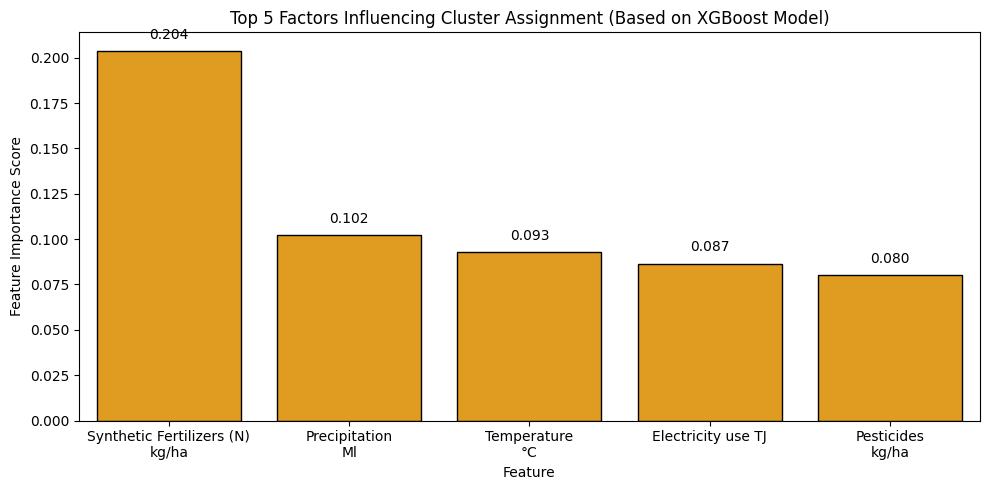

In [57]:
# Get the trained XGBoost model for Method 2
xgb_model = models["XGBoost"]

# Get feature names from X_train of Method 2
feature_names = splits["Outliers replaced using Interpolation Method"]["X_train"].columns

# Get feature importances
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(5)

# Insert line breaks into long labels
importance_df["Feature"] = importance_df["Feature"].str.replace(" kg/ha", "\nkg/ha")
importance_df["Feature"] = importance_df["Feature"].str.replace(" °C", "\n°C")
importance_df["Feature"] = importance_df["Feature"].str.replace(" Ml", "\nMl")

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=importance_df, x="Feature", y="Importance", color="orange", edgecolor="black")
plt.title("Top 5 Factors Influencing Cluster Assignment (Based on XGBoost Model)")
plt.ylabel("Feature Importance Score")
plt.xticks(rotation=0, ha="center")

# Annotate each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.3f}",
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

Synthetic Fertilizers (N) kg/ha, with a score of 0.204, contributed about 20% of the model’s total decision-making power, confirming it as the most influential factor in determining cluster membership. The other top features — Precipitation Ml, Temperature °C, Electricity use TJ, and Pesticides kg/ha — each contributed scores between 0.08 and 0.10, showing that they have a moderate but relevant role in shaping the cluster assignments.

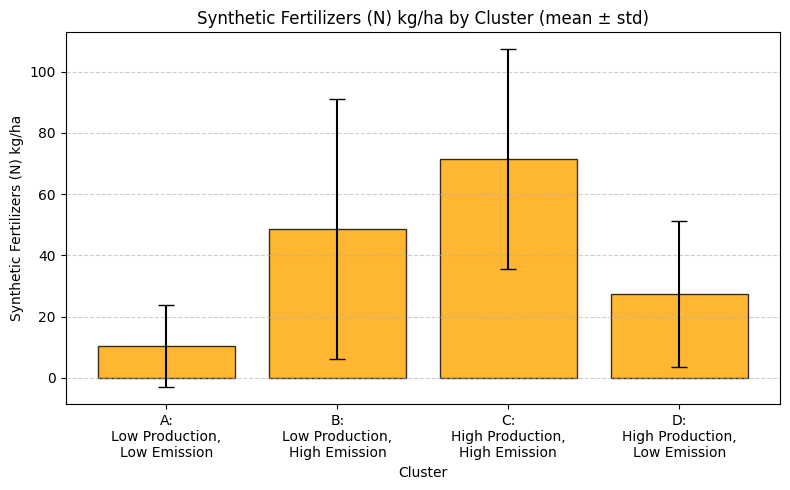

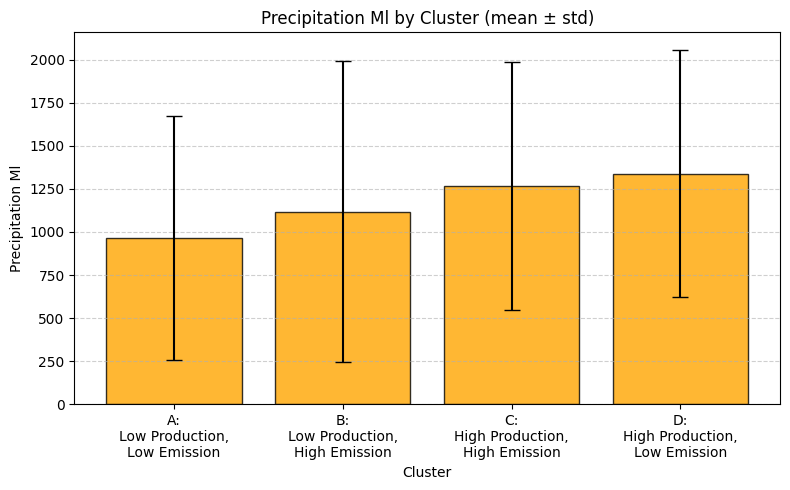

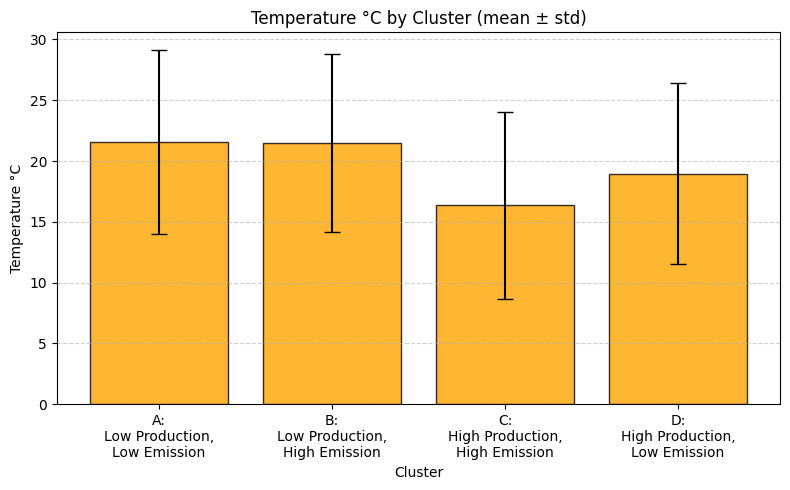

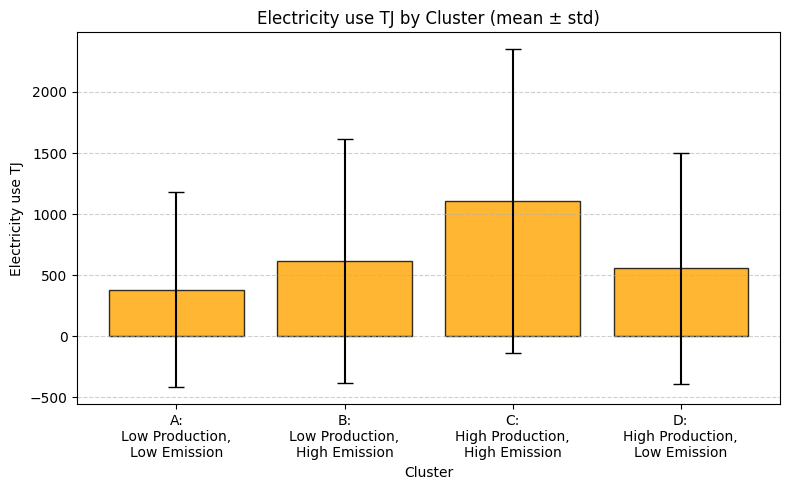

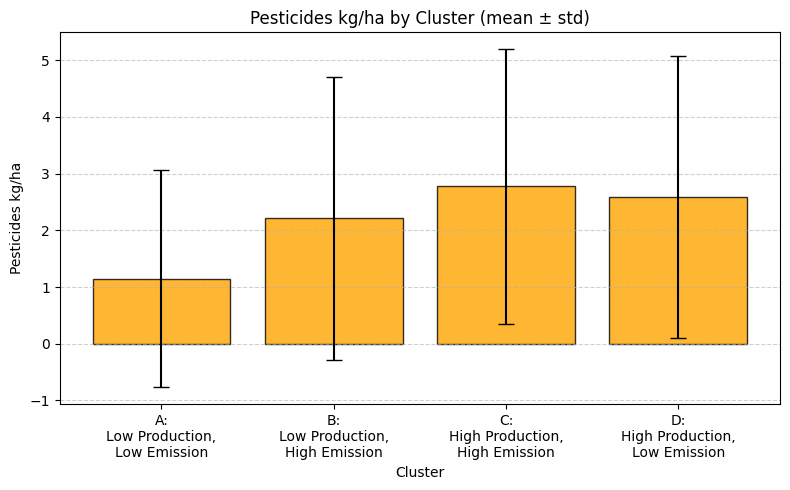

In [58]:
# Top 5 important features from XGBoost (matches screenshot)
top_features = [
    "Synthetic Fertilizers (N) kg/ha",
    "Precipitation Ml",
    "Temperature °C",
    "Electricity use TJ",
    "Pesticides kg/ha"
]

# 2-line cluster labels
cluster_labels = {
    "A: Low Production, Low Emissions": "A:\nLow Production,\nLow Emission",
    "B: Low Production, High Emissions": "B:\nLow Production,\nHigh Emission",
    "C: High Production, High Emissions": "C:\nHigh Production,\nHigh Emission",
    "D: High Production, Low Emissions": "D:\nHigh Production,\nLow Emission"
}

# Group by cluster and calculate mean + std for each feature
grouped = datasets["Outliers replaced using Interpolation Method"].groupby("Quadrant_Cluster")[top_features].agg(["mean", "std"])

# Plot each feature with error bars (mean ± std)
for feature in top_features:
    means = grouped[feature]["mean"]
    stds = grouped[feature]["std"]

    cluster_order = means.index.tolist()
    formatted_labels = [cluster_labels[cluster] for cluster in cluster_order]

    plt.figure(figsize=(8, 5))
    plt.bar(formatted_labels, means.values, yerr=stds.values, capsize=6,
            alpha=0.8, color="orange", edgecolor="black")

    plt.title(f"{feature} by Cluster (mean ± std)")
    plt.ylabel(feature)
    plt.xlabel("Cluster")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [59]:
# See unique countries in your dataset
unique_countries = datasets["Outliers replaced using Interpolation Method"]["Country Standardized"].unique()

# Print all unique country names
print(unique_countries)
print(f"Number of unique countries: {len(unique_countries)}")

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Australia' 'Austria' 'Bahamas' 'Bangladesh' 'Barbados'
 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.'
 'Costa Rica' 'Cuba' 'Cyprus' "Côte d'Ivoire" 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'French Polynesia (Fr.)' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kenya' 'Kuwait'
 'Laos' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi'
 'Malaysia' 'Mali' 'Malta' 'Mauritania' 'Mexico' 'Mongolia'

In [60]:
# Add Continent column and save it back in the dataset
country_to_continent = {
    # Europe
    'Albania': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe', 'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe', 'Croatia': 'Europe',
    'Cyprus': 'Europe', 'Czechia': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe',
    'Latvia': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Malta': 'Europe',
    'Moldova': 'Europe', 'Montenegro': 'Europe', 'Netherlands': 'Europe',
    'North Macedonia': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe',
    'Romania': 'Europe', 'Russia': 'Europe', 'Serbia': 'Europe', 'Slovakia': 'Europe',
    'Slovenia': 'Europe', 'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Ukraine': 'Europe', 'United Kingdom': 'Europe',

    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bangladesh': 'Asia',
    'Bhutan': 'Asia', 'Brunei Darussalam': 'Asia', 'Cambodia': 'Asia', 'China': 'Asia',
    'Georgia': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia',
    'Israel': 'Asia', 'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Lebanon': 'Asia', 'Malaysia': 'Asia',
    'Maldives': 'Asia', 'Mongolia': 'Asia', 'Myanmar': 'Asia', 'Nepal': 'Asia',
    'North Korea': 'Asia', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Philippines': 'Asia',
    'Qatar': 'Asia', 'Saudi Arabia': 'Asia', 'Singapore': 'Asia', 'South Korea': 'Asia',
    'Sri Lanka': 'Asia', 'Syria': 'Asia', 'Tajikistan': 'Asia', 'Thailand': 'Asia',
    'Timor-Leste': 'Asia', 'Turkey': 'Asia', 'Turkmenistan': 'Asia', 'United Arab Emirates': 'Asia',
    'Uzbekistan': 'Asia', 'Vietnam': 'Asia', 'Yemen': 'Asia',

    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cameroon': 'Africa', 'Cape Verde': 'Africa',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Comoros': 'Africa',
    'Congo, Dem. Rep.': 'Africa', 'Congo, Rep.': 'Africa', "Côte d'Ivoire": 'Africa',
    'Djibouti': 'Africa', 'Egypt': 'Africa', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa',
    'Eswatini': 'Africa', 'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa',
    'Ghana': 'Africa', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Kenya': 'Africa',
    'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa', 'Madagascar': 'Africa',
    'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa', 'Morocco': 'Africa',
    'Mozambique': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa', 'Nigeria': 'Africa',
    'Rwanda': 'Africa', 'São Tomé and Príncipe': 'Africa', 'Senegal': 'Africa',
    'Sierra Leone': 'Africa', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Sudan': 'Africa',
    'Sudan': 'Africa', 'Tanzania': 'Africa', 'Togo': 'Africa', 'Tunisia': 'Africa',
    'Uganda': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # Americas
    'Antigua and Barbuda': 'Americas', 'Argentina': 'Americas', 'Bahamas': 'Americas',
    'Barbados': 'Americas', 'Belize': 'Americas', 'Bolivia': 'Americas', 'Brazil': 'Americas',
    'Canada': 'Americas', 'Chile': 'Americas', 'Colombia': 'Americas', 'Costa Rica': 'Americas',
    'Cuba': 'Americas', 'Dominica': 'Americas', 'Dominican Republic': 'Americas',
    'Ecuador': 'Americas', 'El Salvador': 'Americas', 'French Polynesia (Fr.)': 'Americas',
    'Grenada': 'Americas', 'Guatemala': 'Americas', 'Guyana': 'Americas', 'Haiti': 'Americas',
    'Honduras': 'Americas', 'Jamaica': 'Americas', 'Mexico': 'Americas', 'Nicaragua': 'Americas',
    'Panama': 'Americas', 'Paraguay': 'Americas', 'Peru': 'Americas', 'Puerto Rico (U.S.)': 'Americas',
    'Saint Vincent and the Grenadines': 'Americas', 'Suriname': 'Americas',
    'Trinidad and Tobago': 'Americas', 'United States': 'Americas', 'Uruguay': 'Americas',
    'Venezuela': 'Americas',

    # Oceania
    'Australia': 'Oceania', 'Fiji': 'Oceania', 'Micronesia': 'Oceania', 'Nauru': 'Oceania',
    'New Caledonia (Fr.)': 'Oceania', 'New Zealand': 'Oceania', 'Papua New Guinea': 'Oceania',
    'Samoa': 'Oceania', 'Solomon Islands': 'Oceania', 'Tonga': 'Oceania', 'Vanuatu': 'Oceania',
}

# Copy dataset, add continent
df = datasets["Outliers replaced using Interpolation Method"].copy()
df["Continent"] = df["Country Standardized"].map(country_to_continent)

# Save back to dictionary!
datasets["Outliers replaced using Interpolation Method"] = df

# Check any unmapped
unmapped = df[df["Continent"].isna()]["Country Standardized"].unique()
print("Unmapped countries:", unmapped)

Unmapped countries: []


In [61]:
# Filter last 5 years & find top country per cluster + continent
df = datasets["Outliers replaced using Interpolation Method"]

# Filter last 5 years
recent_years = df["Year"].max() - 4
df_recent = df[df["Year"] >= recent_years]

# Count country-year entries per cluster & continent
counts = (
    df_recent.groupby(["Quadrant_Cluster", "Continent", "Country Standardized"])
    .size()
    .reset_index(name="Count")
)

# Sort by count descending
counts = counts.sort_values(["Quadrant_Cluster", "Continent", "Count"], ascending=[True, True, False])

# Pick top country for each cluster-continent combo
top_countries = (
    counts.groupby(["Quadrant_Cluster", "Continent"], group_keys=False)
    .head(1)
    .reset_index(drop=True)
)

print(top_countries)

                      Quadrant_Cluster Continent    Country Standardized  \
0     A: Low Production, Low Emissions    Africa                 Algeria   
1     A: Low Production, Low Emissions  Americas     Antigua and Barbuda   
2     A: Low Production, Low Emissions      Asia             Afghanistan   
3     A: Low Production, Low Emissions    Europe                  Russia   
4     A: Low Production, Low Emissions   Oceania              Micronesia   
5    B: Low Production, High Emissions    Africa                  Gambia   
6    B: Low Production, High Emissions  Americas                  Belize   
7    B: Low Production, High Emissions      Asia       Brunei Darussalam   
8    B: Low Production, High Emissions    Europe                  Greece   
9    B: Low Production, High Emissions   Oceania     New Caledonia (Fr.)   
10  C: High Production, High Emissions    Africa                Djibouti   
11  C: High Production, High Emissions  Americas               Argentina   
12  C: High 

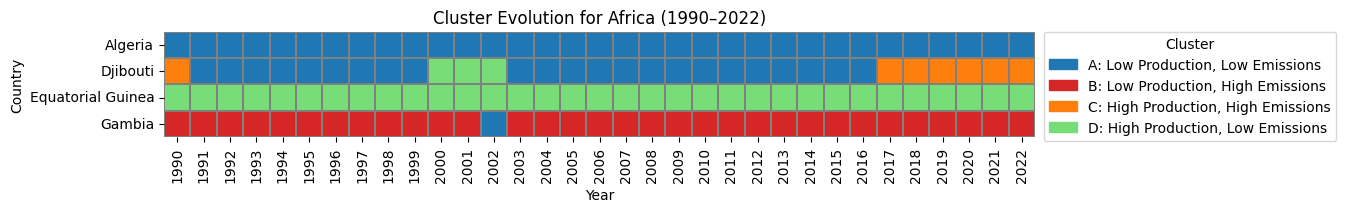

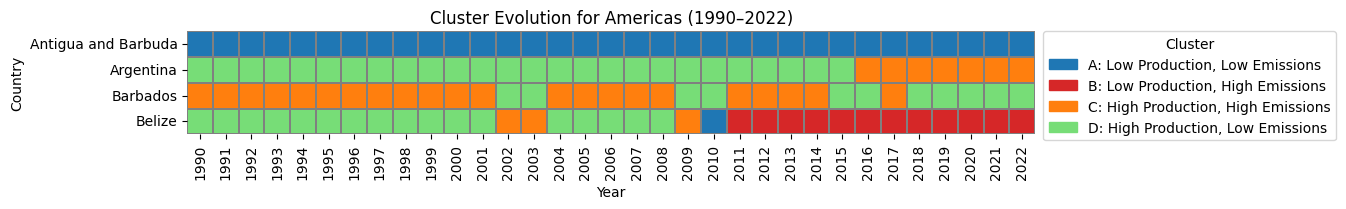

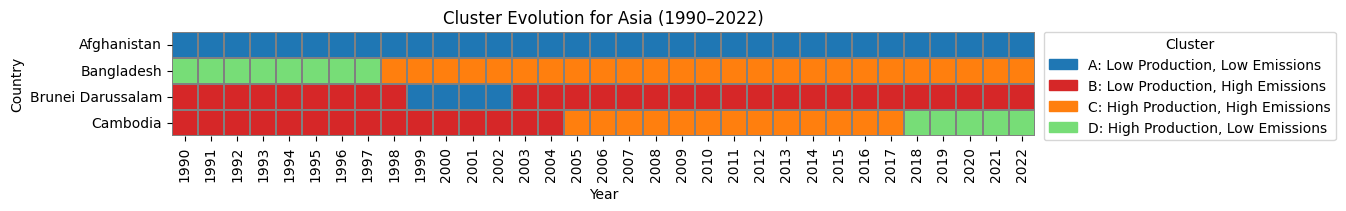

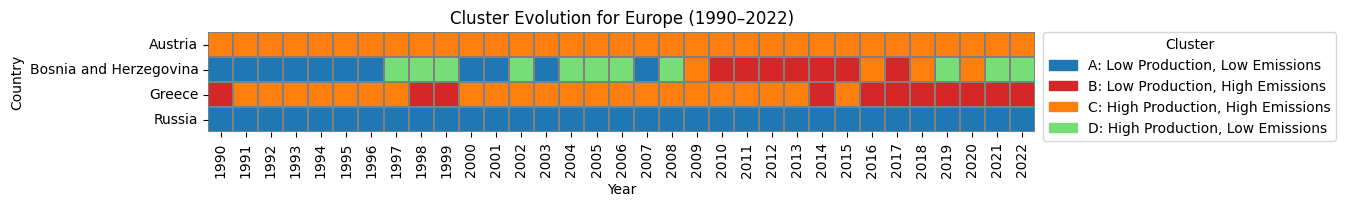

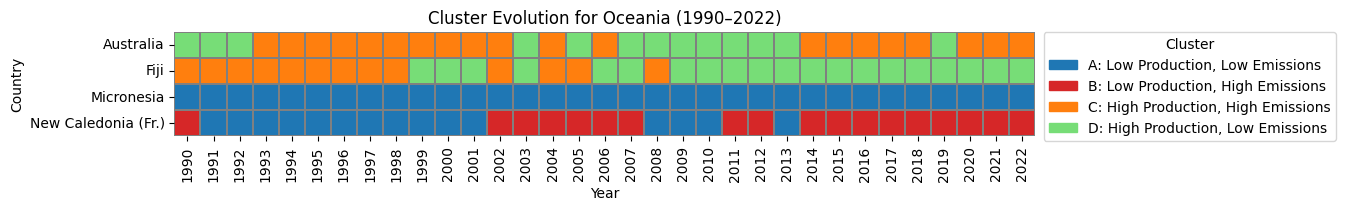

In [62]:
from matplotlib.colors import ListedColormap

# Cluster labels and mapping
cluster_labels = [
    "A: Low Production, Low Emissions",
    "B: Low Production, High Emissions",
    "C: High Production, High Emissions",
    "D: High Production, Low Emissions"
]
cluster_to_code = {label: i for i, label in enumerate(cluster_labels)}

custom_colors = [
    "#1f77b4",  # A: Blue
    "#d62728",  # B: Red
    "#ff7f0e",  # C: Orange
    "#77dd77"   # D: Pastel Green
]
cmap = ListedColormap(custom_colors)

# Prepare dataset
df = datasets["Outliers replaced using Interpolation Method"]

# Updated continent-country mapping
continent_countries = {
    "Africa": ["Algeria", "Gambia", "Djibouti", "Equatorial Guinea"],
    "Americas": ["Antigua and Barbuda", "Belize", "Argentina", "Barbados"],
    "Asia": ["Afghanistan", "Brunei Darussalam", "Bangladesh", "Cambodia"],
    "Europe": ["Russia", "Greece", "Austria", "Bosnia and Herzegovina"],
    "Oceania": ["Micronesia", "New Caledonia (Fr.)", "Australia", "Fiji"]
}

# Add cluster codes
df["Cluster_Code"] = df["Quadrant_Cluster"].map(cluster_to_code)

# Plot one heatmap per continent with improved aspect
for continent, countries in continent_countries.items():
    df_subset = df[df["Country Standardized"].isin(countries)].copy()
    heatmap_data = df_subset.pivot(index="Country Standardized", columns="Year", values="Cluster_Code")

    plt.figure(figsize=(16, 6))

    ax = sns.heatmap(
        heatmap_data,
        cmap=cmap,
        cbar=False,
        linewidths=0.3,
        linecolor='gray',
        square=True  # force cells to be square
    )

    legend_patches = [
        plt.matplotlib.patches.Patch(color=custom_colors[i], label=cluster_labels[i])
        for i in range(len(cluster_labels))
    ]
    plt.legend(
        handles=legend_patches,
        title="Cluster",
        bbox_to_anchor=(1.01, 1),
        loc='upper left',
        borderaxespad=0.
    )

    plt.title(f"Cluster Evolution for {continent} (1990–2022)")
    plt.xlabel("Year")
    plt.ylabel("Country")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

In [63]:
# === Full, non-overlapping country lists per cluster (dominant in last 5 years) ===
# Uses your exact column names and dataset selection.

import pandas as pd

# 1) Start from your dataset and last-5-years filter
df = datasets["Outliers replaced using Interpolation Method"]
recent_years = df["Year"].max() - 4
df_recent = df[df["Year"] >= recent_years]

# 2) For each country, compute how many times it appears in each cluster (last 5 years)
counts = (
    df_recent.groupby(["Country Standardized", "Quadrant_Cluster"])
             .size()
             .reset_index(name="Count")
)

# 3) Get the cluster a country most recently belonged to (tie-breaker if counts tie)
last_year_per_country = df_recent.groupby("Country Standardized")["Year"].max()
last_year_rows = df_recent.merge(
    last_year_per_country.rename("LastYear"),
    left_on="Country Standardized",
    right_index=True
)
last_year_rows = last_year_rows[last_year_rows["Year"] == last_year_rows["LastYear"]]

# If multiple rows for the same country in the last year, use the mode; if tie, pick lexicographically
last_cluster_mode = (
    last_year_rows.groupby("Country Standardized")["Quadrant_Cluster"]
                  .agg(lambda s: s.mode().sort_values().iloc[0])
)

# 4) For each country, keep only the cluster(s) with the max Count; break ties using last_cluster_mode
max_count_per_country = counts.groupby("Country Standardized")["Count"].transform("max")
dominant = counts[counts["Count"] == max_count_per_country].copy()

def choose_cluster(group: pd.DataFrame) -> pd.Series:
    # group is rows for a single country, possibly multiple tied clusters
    country = group.name
    opts = group.sort_values(["Quadrant_Cluster"]).reset_index(drop=True)  # deterministic fallback
    lc = last_cluster_mode.get(country, None)
    if lc in opts["Quadrant_Cluster"].values:
        return opts.loc[opts["Quadrant_Cluster"] == lc].iloc[0]
    return opts.iloc[0]

selected = dominant.groupby("Country Standardized", group_keys=False).apply(choose_cluster)

# 5) Build full lists per cluster (countries appear in exactly one list)
cluster_to_countries = (
    selected.groupby("Quadrant_Cluster")["Country Standardized"]
            .apply(lambda s: sorted(s.tolist()))
            .to_dict()
)

# 6) Print results
for cluster_label, countries in cluster_to_countries.items():
    print(f"\n{cluster_label} — {len(countries)} countries")
    print(countries)

# Optional: if you specifically want four variables when your clusters are A/B/C/D variants:
# A_countries = cluster_to_countries.get("A: Low Production, Low Emissions", cluster_to_countries.get("A", []))
# B_countries = cluster_to_countries.get("B: Low Production, High Emissions", cluster_to_countries.get("B", []))
# C_countries = cluster_to_countries.get("C: High Production, High Emissions", cluster_to_countries.get("C", []))
# D_countries = cluster_to_countries.get("D: High Production, Low Emissions",  cluster_to_countries.get("D", []))


A: Low Production, Low Emissions — 56 countries
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Armenia', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Côte d'Ivoire", 'Dominica', 'Eritrea', 'Eswatini', 'Ethiopia', 'French Polynesia (Fr.)', 'Gabon', 'Georgia', 'Ghana', 'Grenada', 'Iraq', 'Jordan', 'Kazakhstan', 'Lesotho', 'Liberia', 'Libya', 'Micronesia', 'Mongolia', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Papua New Guinea', 'Puerto Rico (U.S.)', 'Russia', 'Rwanda', 'Saint Vincent and the Grenadines', 'Samoa', 'Senegal', 'Solomon Islands', 'Somalia', 'Syria', 'São Tomé and Príncipe', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Uganda', 'Vanuatu', 'Yemen']

B: Low Production, High Emissions — 28 countries
['Belize', 'Bhutan', 'Brazil', 'Brunei Darussalam', 'Colombia', 'Cyprus', 'Gambia', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Iceland', 

/tmp/ipython-input-2025139261.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  selected = dominant.groupby("Country Standardized", group_keys=False).apply(choose_cluster)
